In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.dates as mdates
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from collections import Counter
import nltk
from nltk.corpus import wordnet

In [2]:
df = pd.read_csv('repository_info7.csv')

In [3]:
df

,Commit ID,Commit Message,Commit Date,Changed Files,Num Changed Files,Additions,Deletions,Author Name,Author Email
0,db5176773299b67a2a75c5889fb2aba7fd0fea8a,fix indent,2020-11-30 04:34:51,"['tflearn/activations.py', 'tflearn/objectives...",2,12,14,aymericdamien,aymeric.damien@gmail.com
1,0f44f97c823179d3473e6a17eaa127bdae7360d7,Adding triplet loss (#1161)\n\n* Added fashion...,2020-11-24 06:21:54,['tflearn/objectives.py'],1,25,0,Hemant Rakesh,basketballlife600@gmail.com
2,a497518b6ed0196744cca5ff4ad0a4d4329152c2,Added fashion_mnist dataset (#1160),2020-11-14 10:41:01,['tflearn/datasets/fashion_mnist.py'],1,173,0,Hemant Rakesh,basketballlife600@gmail.com
3,dc31ec05aafe67081552f964ad57cc995dfc2ff6,Fix syntax warning over comparison of literals...,2020-11-11 21:09:30,"['examples/nlp/lstm_generator_textfile.py', 't...",3,4,4,Karthikeyan Singaravelan,tir.karthi@gmail.com
4,e7148af1d97522fa4df899f57673df7f4e2680e1,merge (#1159),2020-11-11 20:42:52,['tflearn/activations.py'],1,25,6,Aymeric Damien,aymeric.damien@gmail.com
...,...,...,...,...,...,...,...,...,...
608,d040e6f1b6b62d9f2e276da1d5e8699c704b5a1a,fix typo,2016-04-02 06:47:17,"['README.md', 'docs/templates/index.md']",2,2,2,aymericdamien,aymeric.damien@gmail.com
609,f50bb1df4cdc1c5bfee2cb6508257edc4a27584b,updated docs,2016-03-31 15:56:49,"['README.md', 'docs/templates/getting_started....",2,14,19,aymericdamien,aymeric.damien@gmail.com
610,7e79b72d329a7d8605d8d712736f6b3a84c2a235,added residual nets,2016-03-31 15:56:03,['examples/images/residual_network_cifar10.py'...,3,117,10,aymericdamien,aymeric.damien@gmail.com
611,d421f2d1e51090e607634604ee80ff889410ddd2,fix examples link,2016-03-31 12:12:17,"['README.md', 'docs/templates/examples.md', 'e...",3,3,3,aymericdamien,aymeric.damien@gmail.com


# Làm sạch và xử lí dữ liệu

In [4]:
#1.In ra thông tin của data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Commit ID          613 non-null    object
 1   Commit Message     613 non-null    object
 2   Commit Date        613 non-null    object
 3   Changed Files      613 non-null    object
 4   Num Changed Files  613 non-null    int64 
 5   Additions          613 non-null    int64 
 6   Deletions          613 non-null    int64 
 7   Author Name        613 non-null    object
 8   Author Email       613 non-null    object
dtypes: int64(3), object(6)
memory usage: 43.2+ KB


### Kiểm tra giá trị null

In [5]:
#2.Trả về tổng số dữ liệu null trong cột
df.isnull().sum()

Commit ID            0
Commit Message       0
Commit Date          0
Changed Files        0
Num Changed Files    0
Additions            0
Deletions            0
Author Name          0
Author Email         0
dtype: int64

### Kiểm tra giá trị trùng lặp

In [6]:
#3.Kiểm tra các giá trị trùng lặp
df.duplicated(subset=None,keep='first').sum()

0

In [7]:
df.describe().round(decimals=2)

,Num Changed Files,Additions,Deletions
count,613.00,613.00,613.00
mean,2.12,55.04,13.44
std,4.52,421.10,83.14
min,0.00,0.00,0.00
25%,1.00,2.00,1.00
50%,1.00,6.00,2.00
75%,2.00,27.00,6.00
max,80.00,10047.00,1623.00


### Làm sạch và xử lí dữ liệu cột Commit Message

<span style="color: blue;">TÌM CÁC COMMIT MESSAGE TRÙNG LẶP<span>

In [8]:
#Clean cột 'Commit Message'
#Kiểm tra các giá trị trùng lặp
# Lọc các dòng có giá trị trùng lặp trong cột "Commit Message"
duplicate_rows = df[df.duplicated(subset='Commit Message', keep=False)]

# Hiển thị số lượng giá trị trùng lặp
duplicate_count = duplicate_rows.shape[0]
print("Số lượng giá trị trùng lặp trong cột 'Commit Message':", duplicate_count)

# Hiển thị các giá trị trùng lặp
duplicate_values = duplicate_rows['Commit Message'].unique()
print("Các giá trị trùng lặp trong cột 'Commit Message':")
print(duplicate_values)


# Hiển thị các dòng có giá trị trùng lặp
print("Các dòng có giá trị trùng lặp trong cột 'Commit Message':")
duplicate_rows.head()



Số lượng giá trị trùng lặp trong cột 'Commit Message': 62
Các giá trị trùng lặp trong cột 'Commit Message':
['minor fix' 'fix bug' 'fix generator' 'fix typo'
 "Merge remote-tracking branch 'origin/master'" 'Update README.md'
 'fix TF 0.12 serialization warnings' 'add code'
 'fix variable_scope for older TF' 'update tests'
 "Merge remote-tracking branch 'upstream/master'" 'update docs'
 'update installation doc' 'fix doc'
 "Merge remote-tracking branch 'tflearn/master'" 'python 3 compatibility'
 'update getting_started docs']
Các dòng có giá trị trùng lặp trong cột 'Commit Message':


,Commit ID,Commit Message,Commit Date,Changed Files,Num Changed Files,Additions,Deletions,Author Name,Author Email
29,b2225273d26e70249621d02f5328dbbf8b9b360b,minor fix,2018-01-11 19:55:02,['tflearn/data_utils.py'],1,1,3,aymericdamien,aymeric.damien@gmail.com
31,83d08d1a3e6740d4867588c6570d25c8d40c850c,fix bug,2018-01-09 19:23:08,['tflearn/data_utils.py'],1,1,1,aymericdamien,aymeric.damien@gmail.com
49,6b05603010b9002e5ad8999fb5d54eabaa0a9fb6,fix bug,2017-07-26 22:51:53,['tflearn/layers/conv.py'],1,3,3,aymericdamien,aymeric.damien@gmail.com
72,21ba73d5f76288386b053cdf31513344bacf4c80,fix generator,2017-05-25 16:21:41,['tflearn/models/generator.py'],1,1,1,aymericdamien,aymeric.damien@gmail.com
75,fea41d468255478f8e4f734912c097bdebe5f767,fix typo,2017-05-23 18:12:53,"['docs/templates/examples.md', 'examples/READM...",2,2,2,aymericdamien,aymeric.damien@gmail.com


<span style="color: blue;">XỬ LÍ CÁC COMMIT MESSAGE TRÙNG LẶP BẰNG CÁCH ĐÁNH SỐ<span>

In [9]:
#Đánh dấu những ô có giá trị trùng lặp trong Commit Message
# Tạo một Series chứa thông tin về việc trùng lặp
duplicates = df['Commit Message'].duplicated(keep=False)

# Đếm số lần xuất hiện của các giá trị trùng lặp
count = 1

# Duyệt qua từng hàng trong DataFrame
for index, row in df.iterrows():
    # Kiểm tra nếu giá trị trong cột "Commit Message" là giá trị trùng lặp
    if duplicates[index]:
        # Thêm tiền tố đánh số vào giá trị trong cột "Commit Message"
        df.at[index, 'Commit Message'] = f'{count} - {row["Commit Message"]}'
        count += 1
df.head()



,Commit ID,Commit Message,Commit Date,Changed Files,Num Changed Files,Additions,Deletions,Author Name,Author Email
0,db5176773299b67a2a75c5889fb2aba7fd0fea8a,fix indent,2020-11-30 04:34:51,"['tflearn/activations.py', 'tflearn/objectives...",2,12,14,aymericdamien,aymeric.damien@gmail.com
1,0f44f97c823179d3473e6a17eaa127bdae7360d7,Adding triplet loss (#1161)\n\n* Added fashion...,2020-11-24 06:21:54,['tflearn/objectives.py'],1,25,0,Hemant Rakesh,basketballlife600@gmail.com
2,a497518b6ed0196744cca5ff4ad0a4d4329152c2,Added fashion_mnist dataset (#1160),2020-11-14 10:41:01,['tflearn/datasets/fashion_mnist.py'],1,173,0,Hemant Rakesh,basketballlife600@gmail.com
3,dc31ec05aafe67081552f964ad57cc995dfc2ff6,Fix syntax warning over comparison of literals...,2020-11-11 21:09:30,"['examples/nlp/lstm_generator_textfile.py', 't...",3,4,4,Karthikeyan Singaravelan,tir.karthi@gmail.com
4,e7148af1d97522fa4df899f57673df7f4e2680e1,merge (#1159),2020-11-11 20:42:52,['tflearn/activations.py'],1,25,6,Aymeric Damien,aymeric.damien@gmail.com


### Làm sạch và xử lí dữ liệu cột Commit Date

<span style="color: blue;">CHUYỂN ĐỔI KIỂU TỪ OBJECT SANG DATE TIME<span>

In [10]:
#Clean cột 'Commit Date'
#Chuyển đổi kiểu dữ liệu của Commit Date sang định dạng ngày tháng năm
df['Commit Date'] = pd.to_datetime(df['Commit Date'])

In [11]:
print(df['Commit Date'].describe(datetime_is_numeric=True))

count                              613
mean     2016-11-13 05:10:29.642740736
min                2016-03-31 12:06:35
25%                2016-05-28 06:31:12
50%                2016-09-13 21:14:53
75%                2017-02-16 03:15:38
max                2020-11-30 04:34:51
Name: Commit Date, dtype: object


### Làm sạch và xử lí dữ liệu cột Additions

<span style="color: blue;">LOẠI CÁC GIÁ TRỊ QUÁ LỚN HOẶC QUÁ BÉ<span>

In [12]:
#Clean cột'Additions'
df= df.loc[(df['Additions'] >= df['Additions'].quantile(0.025)) & (df['Additions'] <= df['Additions'].quantile(0.975))]

### Làm sạch và xử lí dữ liệu cột Deletions

<span style="color: blue;">LOẠI CÁC GIÁ TRỊ QUÁ LỚN HOẶC QUÁ BÉ<span>

In [13]:
#Clean cột'Deletions'
df= df.loc[(df['Deletions'] >= df['Deletions'].quantile(0.025)) & (df['Deletions'] <= df['Deletions'].quantile(0.975))]

### Làm sạch và xử lí dữ liệu cột Num Changed Files

<span style="color: blue;">LOẠI CÁC GIÁ TRỊ QUÁ LỚN HOẶC QUÁ BÉ<span>

In [14]:
#Clean cột'Num Changed Files'
df= df.loc[(df['Num Changed Files'] >= df['Num Changed Files'].quantile(0.025)) & (df['Num Changed Files'] <= df['Num Changed Files'].quantile(0.975))]

# Phân tích dữ liệu 

## Phân tích cột 'Commit ID'

### Câu hỏi phân tích

In [15]:
#1.Có bao nhiêu commit được ghi lại trong dữ liệu?
#2.Tìm tập hợp các tháng trong từng năm không có commit nào? Ta thấy gì về sự tăng dần hoặc giảm dần số lượng commit theo thời gian?
#3.Tháng nào trong năm mà thường không có commit nào, tháng nào luôn có commit? 
#4.Mối quan hệ giữa số lượng submission với dữ liệu tháng và dữ liệu năm là như thế nào?
#5.Dự đoán số lượng commit đạt được trong trong năm 2021?

### 1.Có bao nhiêu commit được ghi lại trong dữ liệu?

In [16]:
commit_count = len(df['Commit ID'])
print("Số lượng commit được ghi lại trong dữ liệu:", commit_count)

Số lượng commit được ghi lại trong dữ liệu: 560


### 2.Tìm tập hợp các tháng trong từng năm không có commit nào? Ta thấy gì về sự tăng dần hoặc giảm dần số lượng commit theo thời gian?

<span style="color: blue;">TẠO 1 DATA FRAME GỒM CỘT YEAR, MONTH, COUNT_COMMIT, DATE</span>


In [17]:
#Tạo 1 data frame mới có các cột day, month, year
df_ID = pd.DataFrame()
df_ID['Commit Date']=df['Commit Date']
df_ID['day'] = df['Commit Date'].dt.day
df_ID['month'] = df['Commit Date'].dt.month
df_ID['year'] = df['Commit Date'].dt.year
df_ID['Commit ID']=df['Commit ID']
# Nhóm theo Year và Month và tính số lượng Commit
df_ID = df_ID.groupby(['year', 'month']).agg({'Commit ID': ['count']})

# Đổi tên cột để phản ánh ý nghĩa
df_ID.columns = ['count_commit']

# Reset index để chuyển các cột nhóm thành cột của DataFrame
df_ID = df_ID.reset_index()

# Chuyển cột 'year' và 'month' thành kiểu dữ liệu 'str'
df_ID['year'] = df_ID['year'].astype(str)
df_ID['month'] = df_ID['month'].astype(str)

# Tạo cột 'date' từ cột 'month' và 'year'
df_ID['date'] = df_ID['month'] + '/' + df_ID['year']

df_ID.head()

,year,month,count_commit,date
0,2016,3,3,3/2016
1,2016,4,71,4/2016
2,2016,5,75,5/2016
3,2016,6,41,6/2016
4,2016,7,41,7/2016


<span style="color: blue;">TÌM TẬP HỢP (THÁNG/NĂM) CÒN THIẾU TỪ THÁNG 3/2016 ĐẾN THÁNG 11/2020 TRONG DATA FRAME TRÊN</span>

In [18]:
# Chuyển cột 'date' thành định dạng datetime
df_ID['date'] = pd.to_datetime(df_ID['date'], format='%m/%Y')

# Tìm mốc nhỏ nhất và mốc lớn nhất trong bảng dữ liệu
min_date = df_ID['date'].min()
max_date = df_ID['date'].max()

# Tạo danh sách các tháng và năm từ mốc nhỏ nhất đến mốc lớn nhất
date_range = pd.date_range(start=min_date, end=max_date, freq='MS')

# Thay đổi định dạng của date_range từ ngày/tháng/năm sang tháng/năm
date_range = date_range.strftime('%m/%Y')

# Kiểm tra các tháng/năm còn thiếu trong bảng dữ liệu
missing_dates = []
for date in date_range:
    if date not in df_ID['date'].dt.strftime('%m/%Y').values:
        missing_dates.append(date)

# In ra các tháng/năm còn thiếu
for date in missing_dates:
    print(date)

02/2018
04/2018
05/2018
02/2019
03/2019
04/2019
05/2019
06/2019
07/2019
08/2019
09/2019
10/2019
11/2019
12/2019
01/2020
02/2020
03/2020
04/2020
05/2020
06/2020
07/2020
08/2020
09/2020
10/2020


<span style="color: blue;">TẠO 1 DATA FRAME MỚI TỪ TẬP HỢP (THÁNG/NĂM) CÒN THIẾU TRONG DATA FRAME TRÊN </span>

In [19]:

# Tạo DataFrame mới
df_missing = pd.DataFrame()
df_missing['year'] = [int(date.split('/')[1]) for date in missing_dates]
df_missing['month'] = [int(date.split('/')[0]) for date in missing_dates]
df_missing['count_commit'] = 0
df_missing['date'] = pd.to_datetime(missing_dates, format='%m/%Y')
df_missing['date'] = df_missing['date'].dt.strftime('%m/%Y')
df_missing.head()

,year,month,count_commit,date
0,2018,2,0,02/2018
1,2018,4,0,04/2018
2,2018,5,0,05/2018
3,2019,2,0,02/2019
4,2019,3,0,03/2019


<span style="color: blue;">GHÉP 2 DATA FRAME LẠI VỚI NHAU VÀ SẮP XẾP</span>

In [20]:
df_ID = pd.concat([df_ID, df_missing], ignore_index=True)
df_ID['date'] = pd.to_datetime(df_ID['date'])
df_ID = df_ID.sort_values('date').reset_index(drop=True)
df_ID.head()

,year,month,count_commit,date
0,2016,3,3,2016-03-01
1,2016,4,71,2016-04-01
2,2016,5,75,2016-05-01
3,2016,6,41,2016-06-01
4,2016,7,41,2016-07-01


<span style="color: blue;">TẠO BIỂU ĐỒ SỐ LƯỢNG COMMIT THEO THỜI GIAN TẠO COMMIT ĐỂ KIỂM TRA XU HƯỚNG TĂNG/GIẢM SỐ LƯỢNG CỦA COMMIT THEO THỜI GIAN</span>

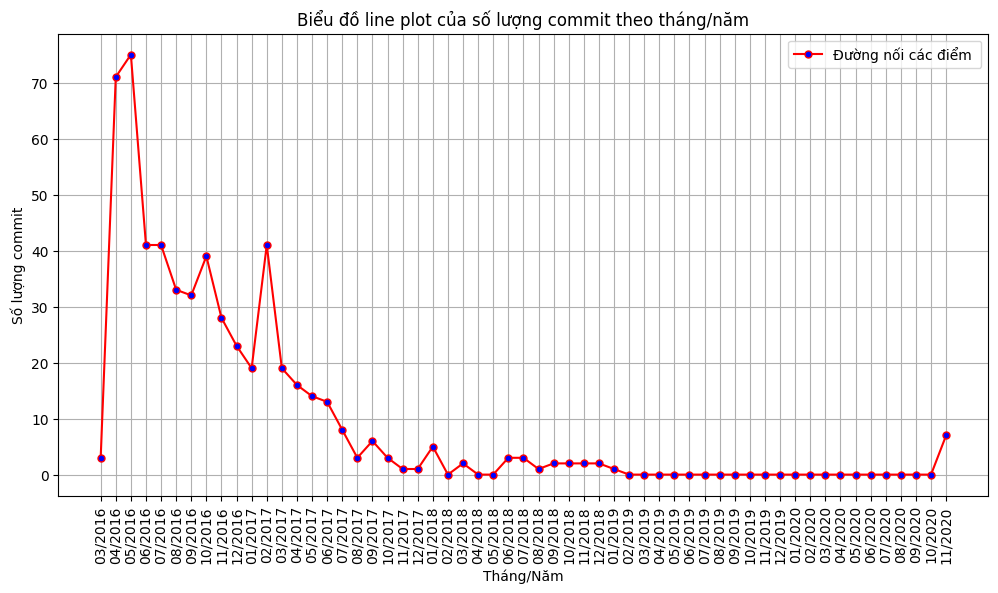

In [21]:
#Tạo biểu đồ "Số lượng Commit" theo thời gian tạo commit để kiểm tra xu hướng tăng/giảm số lượng của commit theo thời gian.
df_ID1=df_ID.copy()
df_ID1['year'] = df_ID1['year'].astype(str)
df_ID1['month'] = df_ID1['month'].astype(str)

# Tạo cột 'date' từ cột 'month' và 'year'
df_ID1['date']=df_ID1['date'].dt.strftime('%m/%Y')

# Vẽ biểu đồ line plot
plt.figure(figsize=(12, 6))
plt.plot(df_ID1['date'], df_ID1['count_commit'], marker='o',linestyle='-', color='red', markerfacecolor='b', markersize=5, label='Đường nối các điểm ')
plt.xlabel('Tháng/Năm')
plt.ylabel('Số lượng commit')
plt.title('Biểu đồ line plot của số lượng commit theo tháng/năm')
plt.xticks(rotation=90)
plt.legend()
plt.grid(True)
plt.savefig('1.png')
plt.show()

<span style="color: blue;">NHẬN XÉT BIỂU ĐỒ</span>

In [22]:
#Biểu đồ này biểu thị số lượng commit trong mỗi tháng từ tháng 3/2016 đến tháng 11/2020.
#1)Xu hướng chung:Từ tháng 3/2016 đến tháng 5/2016, số lượng commit tăng rất mạnh. Từ tháng 5/2016 đến tháng 11/2020, số lượng commit theo từng tháng giảm rất nhanh. Đặc biệt từ tháng 2/2019 trở đi, số lượng commit chạm về đáy 0.

#2)Biến động: Có sự biến động nhất định trong dữ liệu. Đặc biệt là từ tháng 3/2016 đến 4/2016 số lượng commit tăng rất mạnh.

#3)Điểm nổi bật: Có 2 điểm nổi bật trong dữ liệu. Đầu tiên, từ tháng 3/2016 đến tháng 4/2016, số lượng commit tăng đột biến, từ đây ta có thể thấy tháng 3/2016 repository mới tạo nên chưa được chú ý nhiều, đến tháng 4/2016 số lượng commit tăng đột biến có thể là do reposity này là một chủ đề hot vào thời điểm đó. Thứ hai, bắt đầu từ tháng 5/2016 trở đi, số lượng commit giảm mạnh có thể là do chủ đề đã giảm dần độ hot.


### 3.Tháng nào trong năm mà thường không có commit nào, tháng nào luôn có commit? 

<span style="color: blue;">LẬP DATA FRAME GỒM 2 CỘT MONTH VÀ COUNT TRONG ĐÓ COUNT ĐẾM TẦN SUẤT TẠI THÁNG ĐÓ MÀ KHÔNG CÓ COMMIT TÍNH THỜI GIAN TỪ THÁNG 3/2016 ĐẾN 11/2020</span>

In [23]:
# Đếm số lần xuất hiện của mỗi tháng
count_df = df_missing['month'].value_counts().reset_index()

# Sắp xếp lại theo tháng từ 1 đến 12
count_df = count_df.sort_values('index')

# Tạo DataFrame mới gồm 2 cột 'month' và 'count'
new_df = pd.DataFrame({'month': count_df['index'], 'count': count_df['month']})


new_df = new_df.sort_values('month').reset_index(drop=True)
new_df.head()

,month,count
0,1,1
1,2,3
2,3,2
3,4,3
4,5,3


<span style="color: blue;">VẼ BIỂU ĐỒ CỘT CHO DATA FRAME TRÊN</span>

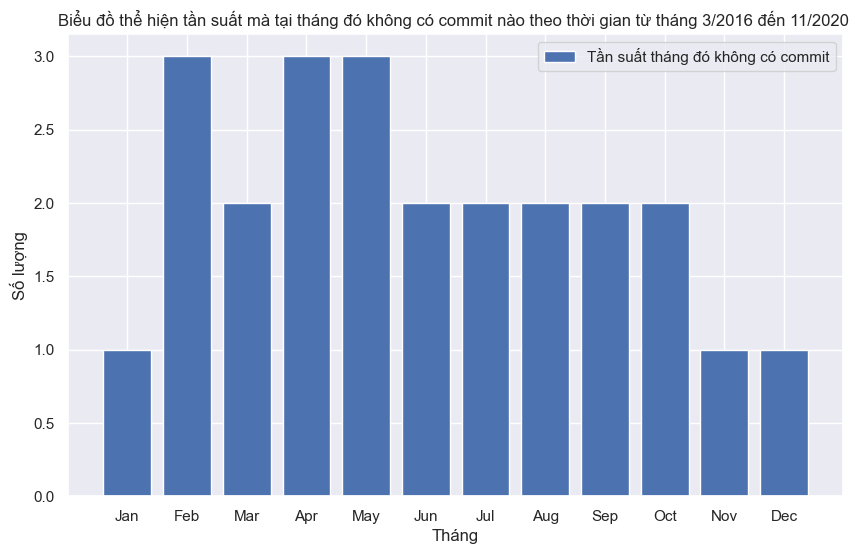

In [24]:

#Vẽ biểu đồ cột chồng
new_df['month'] = new_df['month'].replace({1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7: 'Jul', 8: 'Aug', 9: 'Sep', 10: 'Oct', 11: 'Nov', 12: 'Dec'})

sns.set(style="darkgrid")
plt.figure(figsize=(10,6))

# Vẽ biểu đồ cột cho cột 
plt.bar(new_df['month'], new_df['count'], alpha=1, label='Tần suất tháng đó không có commit')


plt.xlabel('Tháng')
plt.ylabel('Số lượng')
plt.title('Biểu đồ thể hiện tần suất mà tại tháng đó không có commit nào theo thời gian từ tháng 3/2016 đến 11/2020 ')
plt.xticks(new_df['month'])
plt.legend()
plt.savefig('2.png')
plt.show()








<span style="color: blue;">NHẬN XÉT BIỂU ĐỒ</span>

In [25]:
#Biểu đồ này biểu thị chu kì không có commit của các tháng 1 tới tháng 12, xét trong khoảng thời gian từ tháng 3/2016 đến 11/2020(ví dụ xét tháng 1/2016,1/2017, 1/2018, 1/2019, 1/2020 có bao nhiêu tháng 1 không có commit)

#1)Độ cao của các cột: Các tháng 1, 11, 12 có độ cao thấp nhất là 1; các tháng 2, 3, 6, 7, 8, 9, 10 có độ cao là 2; các tháng 4,5 có độ cao cao nhất là 3

#2)Sự thay đổi theo thời gian: Độ cao cột tăng từ tháng 1 trở đi và đạt đỉnh vào tháng 4, 5, từ tháng 5 trở đi độ cao các cột giảm dần và thấp nhất vào tháng 11, tháng 12. Kết hợp với biểu đồ biểu thị số lượng commit trong mỗi tháng từ tháng 3/2016 đến tháng 11/2020, ta có thể dự đoán nguyên nhân là do chủ đề repository chỉ hot trong 2 năm đầu là năm 2016, 2017 trong khoảng thời gian từ năm 2016 đến năm 2020 nên từ đó tại mỗi tháng chỉ có 3 lần tối đa tại tháng đó mà không có commit. Bắt đầu từ năm 2018 trở đi, có 1 số tháng có commit số lượng commit là rất ít.

#Từ đó dựa vào biểu đồ, ta chưa thấy quan hệ giữa chu kì các tháng trong năm với thói quen commit của người dùng


### 4.Mối quan hệ giữa số lượng submission với dữ liệu tháng và dữ liệu năm là như thế nào?

<span style="color: blue;">VẼ BIỂU ĐỒ CỘT THỂ HIỆN SỐ COMMIT TỪ THÁNG 1 ĐẾN THÁNG 12 QUA CÁC NĂM<span>

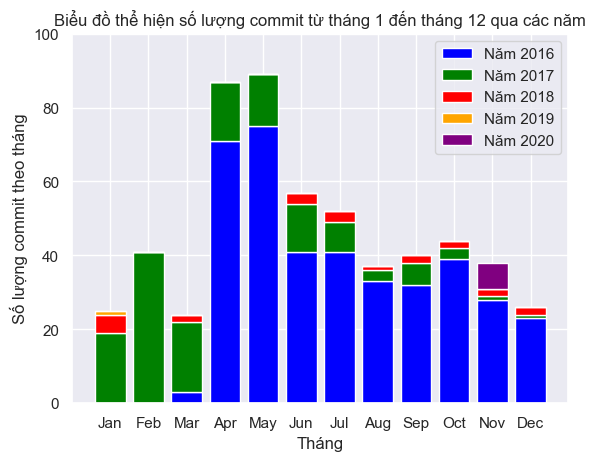

In [26]:
df_ID['year']=df_ID['year'].astype(int)
df_ID['month']=df_ID['month'].astype(int)
years = df_ID['year'].unique()
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
colors = ['blue', 'green', 'red', 'orange', 'purple'] # Màu sắc cho các năm

# Tìm các tháng có dữ liệu
available_months = df_ID['month'].unique()

# Tạo mảng x với các giá trị tháng từ 1 đến 12
x = np.arange(1, 13)

# Chỉ lấy các nhãn tháng có dữ liệu
available_month_labels = [month_labels[i-1] for i in available_months]

# Khởi tạo mảng bottom ban đầu
bottom = np.zeros(len(available_months))

# Vẽ stacked bar chart
for i, year in enumerate(years):
    data_year = df_ID[df_ID['year'] == year]
    height = np.zeros(len(available_months))
    for j, month in enumerate(available_months):
        month_data = data_year[data_year['month'] == month]
        if len(month_data) > 0:
            height[j] = month_data['count_commit'].values[0]
    plt.ylim(0, 100)
    plt.bar(available_months, height, bottom=bottom, label=f'Năm {year}', color=colors[i % len(colors)])
    bottom += height # Cập nhật giá trị bottom cho cột chồng tiếp theo

# Đặt nhãn cho trục x và y
plt.xlabel('Tháng')
plt.ylabel('Số lượng commit theo tháng')
plt.title('Biểu đồ thể hiện số lượng commit từ tháng 1 đến tháng 12 qua các năm')
plt.xticks(available_months, available_month_labels) # Chỉ hiển thị nhãn tháng có dữ liệu
plt.legend()
plt.savefig('3.png')
# Hiển thị đồ thị
plt.show()


<span style="color: blue;">NHẬN XÉT BIỂU ĐỒ</span>

In [27]:
#Biểu đồ này tính số lượng commit từ tháng 1 đến tháng 12, xét từ tháng 3/2016 đến 11/2020

#1)Độ cao cột chồng: Độ cao mỗi cột trong biểu đồ tăng dần từ tháng 1, đạt độ cao lớn nhất tại tháng 4, tháng 5 và giảm dần về tháng từ tháng 5 trở đi

#2)Tỉ lệ giữa các năm trong cột: màu xanh biển của năm 2016 có xu hướng tỷ lệ cao nhất, tỷ lệ màu có xu hướng giảm dần từ năm 2017, 2018, 2019 và cuối cùng tỷ lệ của cột 2020 là ít nhất

#3)Thay đổi theo thời gian: Qua biểu đồ cột chồng, ta nhận thấy quy luật: 
# +với yếu tố tháng, độ dài cột tăng từ tháng 1 và đạt đỉnh tháng 4 và 5, từ tháng 5 độ dài giảm dần
# +với yếu tố năm, tỷ lệ màu giảm dần theo thứ tự năm 2016, 2017, 2018, 2019, 2020.

#Ta có thể dự đoán quy luật trên có thể có 2 lý do:
# +Với yếu tố tháng có thể là từ tháng 4 đến tháng 8 rơi vào mùa hè, mùa du lịch, sinh viên và nhiều người có thể có thời gian để trau dồi kiến thức và tìm hiểu thêm nhiều khóa học, vấn đề. 
# +Với yếu tố năm có thể là do năm 2016, 2017, vấn đề mới được đưa ra và rất nhiều người tò mò, đóng góp các commit, vấn đề giảm dần độ hot từ năm 2018 trở đi.



<span style="color: blue;">VẼ BIỂU ĐỒ LINE PLOT<span>

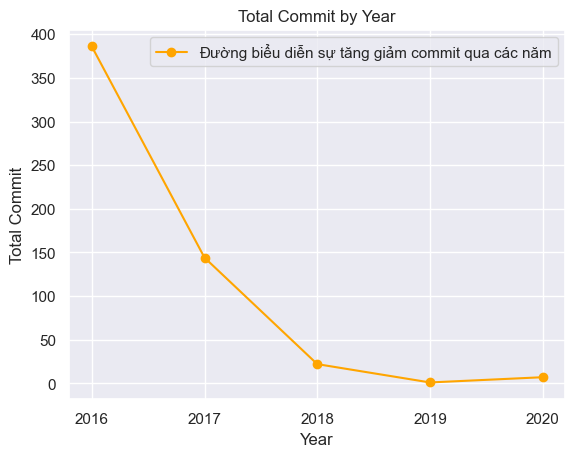

In [28]:
years = [2016, 2017, 2018, 2019, 2020]
# Tính tổng số commit theo năm
commit_by_year = df_ID.groupby('year')['count_commit'].sum().reset_index()

# Vẽ biểu đồ line plot
plt.plot(commit_by_year['year'], commit_by_year['count_commit'],marker='o', color='orange',label='Đường biểu diễn sự tăng giảm commit qua các năm')
plt.xlabel('Year')
plt.ylabel('Total Commit')
plt.title('Total Commit by Year')
plt.legend()
plt.grid(True)

# Chỉnh lại trục Ox
plt.xticks(commit_by_year['year'], years)
plt.savefig('4.png')
plt.show()

<span style="color: blue;">NHẬN XÉT BIỂU ĐỒ</span>

In [29]:
#Biểu đồ này biểu thị số lượng commit từ năm 2016 đến năm 2020

#1)Xu hướng chung: Số lượng commit giảm nhanh từ năm 2016 trở đi.

#2)Biến động: Đồ thị hầu như không có biến động.

#Ta có thể dự đoán nguyên nhân số lượng commit giảm nhanh từ năm 2016 trở đi là do repository giảm dần độ hot qua các năm. 


### 5.Dự đoán số lượng commit đạt được trong trong năm 2021?

<span style="color: blue;">DÙNG MÔ HÌNH LINEAR REGRESSION VÀ VẼ BIỂU ĐỒ<span>

C:\Users\ASUS\miniconda3\envs\cuongnm\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ASUS\miniconda3\envs\cuongnm\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


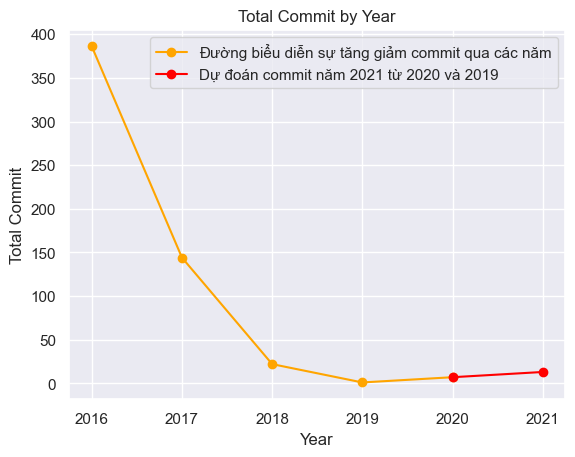

In [30]:

years = [2016, 2017, 2018, 2019, 2020, 2021]  # Bổ sung năm 2021 vào danh sách các năm

# Tính tổng số commit theo năm
commit_by_year = df_ID.groupby('year')['count_commit'].sum().reset_index()

# Lấy dữ liệu từ năm 2020 và 2019
data = commit_by_year[commit_by_year['year'].isin([2020, 2019])]

# Tạo mô hình linear regression
regression_model = LinearRegression()
regression_model.fit(data[['year']], data['count_commit'])

# Dự đoán số commit cho năm 2021
predicted_commit_2021 = regression_model.predict([[2021]])

# Vẽ biểu đồ line plot
plt.plot(commit_by_year['year'], commit_by_year['count_commit'], marker='o', color='orange', label='Đường biểu diễn sự tăng giảm commit qua các năm')
plt.xlabel('Year')
plt.ylabel('Total Commit')
plt.title('Total Commit by Year')
plt.legend()
plt.grid(True)

# Chỉnh lại trục Ox
plt.xticks(years)  # Sử dụng years làm nhãn trên trục x

# Vẽ linear regression line từ năm 2020 và 2019
x_regression = np.array([[2020], [2021]])
y_regression = regression_model.predict(x_regression)
plt.plot(x_regression, y_regression, marker='o', color='red', label='Dự đoán commit năm 2021 từ 2020 và 2019')
plt.legend()
plt.savefig('5.png')
plt.show()

<span style="color: blue;">NHẬN XÉT BIỂU ĐỒ</span>

In [31]:
#Biểu đồ này biểu thị số lượng commit từ năm 2016 đến năm 2020 và dự đoán số lượng commit năm 2021 qua sự biến động từ năm 2019 đến năm 2020

#1)Số lượng commit dự đoán năm 2021 tăng nhẹ so với năm 2020


## Phân tích cột 'Commit message'

### Câu hỏi phân tích

In [32]:
#1.Tần suất xuất hiện của mỗi từ trong cột 'Commit mesage' là bao nhiêu? Có bao nhiêu từ có tần suất xuất hiện giống nhau?
#2. Khi các động từ (fix, merge, update, pull, add, added, fixed) xuất hiện thì có ảnh hưởng số dòng thêm, bớt và số lượng tệp tin thay đổi không?
#3.Trong các từ (fix, merge, update, pull, add, added, fixed) từ nào có tỉ lệ mà khi xuất hiện trong Commit Message số dòng thêm là lớn nhất? Từ nào có tỉ lệ mà khi xuất hiện số dòng xóa là lớn nhất? Từ nào có tỉ lệ mà khi xuất hiện số tập tin thay đổi là nhiều nhất?
#4.Commit Message nào dài nhất, ngắn nhất? 
#5.Commit Message trong cả bảng dữ liệu có số lượng dòng thêm, bớt và số lượng tệp tin thay đổi nhiều nhất và nhỏ nhất là Commit Message nào?
#6.Chủ đề commit thường là chủ đề gì? 

### 1.Tần suất xuất hiện của mỗi từ trong cột 'Commit mesage' là bao nhiêu? Có bao nhiêu từ có tần suất xuất hiện giống nhau?

<span style="color: blue;">LẬP DATAFRAME THỂ HIỆN TẦN SUẤT XUẤT HIỆN CỦA MỖI TỪ TRONG CỘT COMMIT MESSAGE<span>

In [33]:
# Tạo một từ điển để lưu trữ số lần xuất hiện của các từ
word_counts = {}

# Duyệt qua từng hàng trong DataFrame
for index, row in df.iterrows():
    # Lấy nội dung của cột 'Commit message'
    commit_message = row['Commit Message']
    
    # Chuyển đổi nội dung về chữ thường (hoặc chữ hoa)
    commit_message = commit_message.lower()
    
    # Tách nội dung thành các từ riêng biệt
    words = commit_message.split()
    
    # Duyệt qua từng từ và tăng giá trị tương ứng trong từ điển
    for word in words:
        if word in word_counts:
            word_counts[word] += 1
        else:
            word_counts[word] = 1




In [34]:
# Tạo danh sách các từ xuất hiện và số lần xuất hiện
word_list = []
count_list = []

# Duyệt qua từ điển word_counts
for word, count in word_counts.items():
    word_list.append(word)
    count_list.append(count)

# Tạo DataFrame từ danh sách các từ và số lần xuất hiện
data = {'Word': word_list, 'Count': count_list}
df_word_counts = pd.DataFrame(data)
df_word_counts = df_word_counts.sort_values('Count').reset_index(drop=True)

# In DataFrame
df_word_counts.head()

,Word,Count
0,string's,1
1,finetuning_vgg,1
2,(#332),1
3,vgg.tflearn,1
4,revised,1


<span style="color: blue;">NHẬN XÉT DATA FRAME TRÊN<span>
    

In [35]:
#1)Các từ "fix", "update", "request", "pull", "merge", "fixing", "bug" và "error" xuất hiện nhiều lần trong cột "Word". Điều này có thể cho thấy rằng có sự chú trọng vào việc sửa lỗi và cải thiện trong tài liệu và mã nguồn.

#2)Các từ như "python", "tf" (có thể là TensorFlow), "function", "layer" và "validation" xuất hiện trong cột "Word". Điều này cho thấy rằng commit thường liên quan các hàm, lớp, Python và TensorFlow.

#3)Các từ phổ biến khác: Các từ như "support", "branch", "issue", "remote-tracking", "default", "validation" và "dataset" xuất hiện trong cột "Word". Điều này có thể cho thấy rằng có sự quan tâm đến việc hỗ trợ, xử lý vấn đề, và xử lý dữ liệu.


<span style="color: blue;">LẬP DATA FRAME TÌM SỐ LƯỢNG TỪ CÓ TẦN SUẤT XUẤT HIỆN GIỐNG NHAU<span>

In [36]:
# Đếm số lần xuất hiện của từng giá trị
count_occurrences = Counter(count_list)

# Tạo danh sách các giá trị và số lượng từ tương ứng
count_values = []
count_word_counts = []

for count, occurrence in count_occurrences.items():
    count_values.append(count)
    count_word_counts.append(occurrence)

# Tạo DataFrame từ danh sách các giá trị và số lượng từ
data = {'Count': count_values, 'Word Count': count_word_counts}
df_count_word_counts = pd.DataFrame(data)

df_count_word_counts = df_count_word_counts.sort_values('Count').reset_index(drop=True)

# In DataFrame
df_count_word_counts.head()


,Count,Word Count
0,1,1221
1,2,272
2,3,99
3,4,58
4,5,33


<span style="color: blue;">NHẬN XÉT DATA FRAME TRÊN<span>
    

In [37]:
#1)Các từ cụm từ có xu hướng có tần xuất dưới 15 lần
#2)Nhiều từ xuất 1 lần duy nhất, từ đó có thể rút ra là các commit thường đề cập tới nhiều vấn đề khác nhau

### 2.Khi các động từ (fix, merge, update, pull, add, added, fixed) xuất hiện thì có ảnh hưởng số dòng thêm, bớt và số lượng tệp tin thay đổi không?

<span style="color: blue;">LẬP DATA FRAME TÌM ĐỘNG TỪ TRONG DATA FRAME TRÊN<span>

In [38]:
# Function để xác định loại từ (part-of-speech) của từ
def get_word_pos(word):
    pos = nltk.pos_tag([word])[0][1]
    if pos.startswith('V'):
        return wordnet.VERB
    return None

# Lọc các dòng có từ trong cột "Word" là động từ
verb_rows = df_word_counts[df_word_counts['Word'].apply(lambda x: get_word_pos(x) is not None)]
verb_rows = verb_rows.reset_index(drop=True)
verb_rows = verb_rows.sort_values(by='Count', ascending=False).reset_index(drop=True)
# Hiển thị kết quả
verb_rows

,Word,Count
0,add,61
1,added,57
2,is,32
3,fixed,25
4,be,16
...,...,...
134,forgiving,1
135,upsampling,1
136,trained,1
137,included,1


<span style="color: blue;">LẬP DATA FRAME THỂ HIỆN TỈ LỆ KHI 1 TỪ XUẤT HIỆN Ở COMMIT MESSAGE THÌ SỐ LƯỢNG DÒNG THÊM, BỚT VÀ SỐ LƯỢNG TẬP TIN THAY ĐỔI NHƯ THẾ NÀO<span>

In [39]:

# Danh sách các từ cần tính toán
words = ['fix', 'merge', 'update', 'pull', 'add', 'added', 'fixed']

# Tạo một từ điển để lưu trữ thông tin
data = {'Verb': [], 'Count': [], 'Additions Ratio': [], 'Deletions Ratio': [], 'Num Changed Files Ratio': []}

# Duyệt qua danh sách các từ
for word in words:
    # Tạo DataFrame con chỉ chứa các hàng có từ word trong cột 'Commit Message'
    df_word = df[df['Commit Message'].str.contains(word, case=False)]
    
    # Đếm số lần xuất hiện của từ word trong cột 'Commit Message'
    word_count = df_word_counts.loc[df_word_counts['Word'] == word, 'Count'].values[0]
    
    # Tính tổng các giá trị trong cột 'Additions', 'Deletions', 'Changed Files' của DataFrame con
    total_additions = df_word['Additions'].sum()
    total_deletions = df_word['Deletions'].sum()
    total_changed_files = df_word['Num Changed Files'].sum()
    
    # Tính tỷ lệ xuất hiện của từ word với các cột
    additions_ratio =  (total_additions/word_count)
    deletions_ratio =  (total_deletions/word_count)
    changed_files_ratio = (total_changed_files/word_count) 
    
    # Thêm thông tin vào từ điển
    data['Verb'].append(word)
    data['Count'].append(word_count)
    data['Additions Ratio'].append(additions_ratio)
    data['Deletions Ratio'].append(deletions_ratio)
    data['Num Changed Files Ratio'].append(changed_files_ratio)

# Tạo DataFrame từ từ điển
df_result = pd.DataFrame(data)
df_result['Additions Ratio']=df_result['Additions Ratio'].round(decimals=2)
df_result['Deletions Ratio']=df_result['Deletions Ratio'].round(decimals=2)
df_result['Num Changed Files Ratio']=df_result['Num Changed Files Ratio'].round(decimals=2)
# In kết quả
df_result.head(10)

,Verb,Count,Additions Ratio,Deletions Ratio,Num Changed Files Ratio
0,fix,224,9.85,4.47,1.44
1,merge,88,24.90,3.86,1.48
2,update,79,15.65,5.03,1.51
3,pull,72,24.17,3.29,1.40
4,add,61,100.70,7.28,3.28
5,added,57,46.96,3.11,1.56
6,fixed,25,5.60,3.36,0.96


<span style="color: blue;">NHẬN XÉT DATA FRAME TRÊN<span>

In [40]:
#1)Các động từ "fix", "update","pull", "merge", "fixed","added" ảnh hưởng nhiều tới việc thêm dòng, xóa dòng, file thay đổi vì tỉ lệ 'Additions Ratio', 'Deletions Ratio', 'Num Changed Files Ratio' đều rất cao với mỗi động từ.

### 3.Trong các từ (fix, merge, update, pull, add, added, fixed) từ nào có tỉ lệ mà khi xuất hiện trong Commit Message số dòng thêm là lớn nhất? Từ nào có tỉ lệ mà khi xuất hiện số dòng xóa là lớn nhất? Từ nào có tỉ lệ mà khi xuất hiện số tập tin thay đổi là nhiều nhất?

<span style="color: blue;">THÔNG TIN VỀ TỪ KHI XUẤT HIỆN CÓ TỈ LỆ SỐ DÒNG THÊM LÀ LỚN NHẤT<span>

In [41]:
max_addition=df_result['Additions Ratio'].max()
max_addition_info=df_result.loc[df_result['Additions Ratio']==max_addition]
max_addition_info

,Verb,Count,Additions Ratio,Deletions Ratio,Num Changed Files Ratio
4,add,61,100.7,7.28,3.28


<span style="color: blue;">THÔNG TIN VỀ TỪ KHI XUẤT HIỆN CÓ TỈ LỆ SỐ DÒNG XÓA LÀ LỚN NHẤT<span>

In [42]:
max_deletion=df_result['Deletions Ratio'].max()
max_deletion_info=df_result.loc[df_result['Deletions Ratio']==max_deletion]
max_deletion_info

,Verb,Count,Additions Ratio,Deletions Ratio,Num Changed Files Ratio
4,add,61,100.7,7.28,3.28


<span style="color: blue;">THÔNG TIN VỀ TỪ KHI XUẤT HIỆN CÓ TỈ LỆ SỐ TẬP TIN THAY ĐỔI LÀ NHIỂU NHẤT<span>

In [43]:
max_changed_files=df_result['Num Changed Files Ratio'].max()
max_changed_files_info=df_result.loc[df_result['Num Changed Files Ratio']==max_changed_files]
max_changed_files_info

,Verb,Count,Additions Ratio,Deletions Ratio,Num Changed Files Ratio
4,add,61,100.7,7.28,3.28


### 4.Commit Message nào dài nhất, ngắn nhất?

<span style="color: blue;">COMMIT MESSAGE DÀI NHẤT<span>

In [44]:
df['Commit Date'] = pd.to_datetime(df['Commit Date'])
# Tìm chỉ mục của dòng có Commit message dài nhất
max_commit_message_length_index = df['Commit Message'].str.len().idxmax()

# Tạo DataFrame từ dòng có Commit message dài nhất
max_commit_message_df = pd.DataFrame(df.loc[max_commit_message_length_index]).transpose()
max_commit_message_df

,Commit ID,Commit Message,Commit Date,Changed Files,Num Changed Files,Additions,Deletions,Author Name,Author Email
227,9b7d0b89d72f4c7986bd3692d01d19adbfe66df1,Make NLP example able to use cyrillic script i...,2016-11-18 07:00:37,['examples/nlp/lstm_generator_cityname.py'],1,6,5,Илья Юрков,urkov@lightsoft.ru


<span style="color: blue;">COMMIT MESSAGE NGẮN NHẤT<span>

In [45]:
df['Commit Date'] = pd.to_datetime(df['Commit Date'])
# Tìm chỉ mục của dòng có Commit message ngắn nhất
min_commit_message_length_index = df['Commit Message'].str.len().idxmin()

# Tạo DataFrame từ dòng có Commit message ngắn nhất
min_commit_message_df = pd.DataFrame(df.loc[min_commit_message_length_index]).transpose()
min_commit_message_df

,Commit ID,Commit Message,Commit Date,Changed Files,Num Changed Files,Additions,Deletions,Author Name,Author Email
597,f33938c0e12d00d30d1a1370f2d52f7f0664db0c,Fix #9,2016-04-05 15:16:45,"['tflearn/layers/recurrent.py', 'tflearn/model...",2,39,30,aymericdamien,aymeric.damien@gmail.com


### 5.Commit Message trong cả bảng dữ liệu có số lượng dòng thêm, bớt và số lượng tệp tin thay đổi nhiều nhất và nhỏ nhất là Commit Message nào?

<span style="color: blue;">COMMIT MESSAGE TRONG BẢNG DỮ LIỆU CÓ SỐ LƯỢNG DÒNG THÊM NHIỀU NHẤT VÀ ÍT NHẤT<span>

In [46]:
df_1=df.copy()
# Tìm chỉ mục của commit message có số lượng thay đổi nhiều nhất
max_changes_index = df_1[['Additions']].sum(axis=1).idxmax()

# Tìm chỉ mục của commit message có số lượng thay đổi ít nhất
min_changes_index = df_1[['Additions']].sum(axis=1).idxmin()

# Tạo DataFrame từ dòng tìm được
df_addition_changes = pd.DataFrame(df_1.loc[max_changes_index]).transpose()
df_min_changes = pd.DataFrame(df_1.loc[min_changes_index]).transpose()
# Tạo DataFrame mới chứa dòng có số lượng thay đổi ít nhất
df_addition_changes = pd.concat([df_addition_changes, df_min_changes], ignore_index=True)
del df_1
df_addition_changes

,Commit ID,Commit Message,Commit Date,Changed Files,Num Changed Files,Additions,Deletions,Author Name,Author Email
0,40091cd91c36c5445f53c75f2aff987bd41404ca,Add spiral dataset example notebook,2016-04-11 19:22:04,['examples/notebooks/spiral.ipynb'],1,268,0,Brett Naul,brettnaul@gmail.com
1,f18af5cb1f71f58d7184bf9039fb9bda39e92559,Do not install tests in site-packages (#1104),2018-12-15 21:45:44,['setup.py'],1,1,1,cgohlke,cjgohlke@gmail.com


<span style="color: blue;">COMMIT MESSAGE TRONG BẢNG DỮ LIỆU CÓ SỐ LƯỢNG DÒNG XÓA NHIỀU NHẤT VÀ ÍT NHẤT<span>

In [47]:
df_2=df.copy()
# Tìm chỉ mục của commit message có số lượng thay đổi nhiều nhất
max_changes_index = df_2[['Deletions']].sum(axis=1).idxmax()

# Tìm chỉ mục của commit message có số lượng thay đổi ít nhất
min_changes_index = df_2[['Deletions']].sum(axis=1).idxmin()

# Tạo DataFrame từ dòng tìm được
df_deletion_changes = pd.DataFrame(df_2.loc[max_changes_index]).transpose()
df_min_changes = pd.DataFrame(df_2.loc[min_changes_index]).transpose()
# Tạo DataFrame mới chứa dòng có số lượng thay đổi ít nhất
df_deletion_changes = pd.concat([df_deletion_changes, df_min_changes], ignore_index=True)
del df_2
df_deletion_changes.head()

,Commit ID,Commit Message,Commit Date,Changed Files,Num Changed Files,Additions,Deletions,Author Name,Author Email
0,ab71b050027c9ee6d55f70492d6f1f2c4dd0b440,add inception-resnet-v2 in branch inception-re...,2016-11-10 06:01:51,"['examples/images/inception_resnet_v2.py', 'tf...",4,75,63,burness,dss_1990@sina.com
1,0f44f97c823179d3473e6a17eaa127bdae7360d7,Adding triplet loss (#1161)\n\n* Added fashion...,2020-11-24 06:21:54,['tflearn/objectives.py'],1,25,0,Hemant Rakesh,basketballlife600@gmail.com


<span style="color: blue;">COMMIT MESSAGE TRONG BẢNG DỮ LIỆU CÓ SỐ LƯỢNG TẬP TIN THAY ĐỔI NHIỀU NHẤT VÀ ÍT NHẤT<span>

In [48]:
df_3=df.copy()
# Tìm chỉ mục của commit message có số lượng thay đổi nhiều nhất
max_changes_index = df_3[['Num Changed Files']].sum(axis=1).idxmax()

# Tìm chỉ mục của commit message có số lượng thay đổi ít nhất
min_changes_index = df_3[['Num Changed Files']].sum(axis=1).idxmin()

# Tạo DataFrame từ dòng tìm được
df_changed_files = pd.DataFrame(df_3.loc[max_changes_index]).transpose()
df_min_changes = pd.DataFrame(df_3.loc[min_changes_index]).transpose()
# Tạo DataFrame mới chứa dòng có số lượng thay đổi ít nhất
df_changed_files = pd.concat([df_changed_files, df_min_changes], ignore_index=True)
del df_3
df_changed_files.head()

,Commit ID,Commit Message,Commit Date,Changed Files,Num Changed Files,Additions,Deletions,Author Name,Author Email
0,29f08d18f7fdfb451931a92b51add0013ec63a5a,Speed up importing (#1070)\n\n* initialization...,2018-07-01 23:28:31,"['tflearn/data_utils.py', 'tflearn/initializat...",5,246,31,Aarni Koskela,akx@iki.fi
1,0f44f97c823179d3473e6a17eaa127bdae7360d7,Adding triplet loss (#1161)\n\n* Added fashion...,2020-11-24 06:21:54,['tflearn/objectives.py'],1,25,0,Hemant Rakesh,basketballlife600@gmail.com


<span style="color: blue;">THÔNG TIN COMMIT MESSAGE TRONG BẢNG DỮ LIỆU CÓ TỔNG SỐ LƯỢNG DÒNG THAY ĐỔI NHIỀU NHẤT VÀ ÍT NHẤT<span>

In [49]:
df_4=df.copy()

# Tìm chỉ mục của commit message có số lượng thay đổi nhiều nhất
max_changes_index = (df['Additions'] + df['Deletions']).idxmax()

# Tìm chỉ mục của commit message có số lượng thay đổi ít nhất
min_changes_index = (df['Additions'] + df['Deletions']).idxmin()

# Tạo DataFrame từ dòng tìm được
df_changes = pd.DataFrame(df_4.loc[max_changes_index]).transpose()
df_min_changes = pd.DataFrame(df_4.loc[min_changes_index]).transpose()
# Tạo DataFrame mới chứa dòng có số lượng thay đổi ít nhất
df_changes = pd.concat([df_changes, df_min_changes], ignore_index=True)
del df_4
df_changes.head()

,Commit ID,Commit Message,Commit Date,Changed Files,Num Changed Files,Additions,Deletions,Author Name,Author Email
0,29f08d18f7fdfb451931a92b51add0013ec63a5a,Speed up importing (#1070)\n\n* initialization...,2018-07-01 23:28:31,"['tflearn/data_utils.py', 'tflearn/initializat...",5,246,31,Aarni Koskela,akx@iki.fi
1,3710244cc6a3abb5c49b0575310bb4b82bfd975d,14 - fix TF 0.12 serialization warnings,2016-12-19 21:03:19,['tflearn/helpers/trainer.py'],1,1,0,aymericdamien,aymeric.damien@gmail.com


### 6.Chủ đề commit thường là chủ đề gì? 

<span style="color: blue;">LẬP DATA FRAME CÁC KEY WORD DANH TỪ THỂ HIỆN NGƯỜI DÙNG HƯỚNG ĐẾN KHI TẠO COMMIT<span>

In [50]:
# Function để xác định loại từ (part-of-speech) của từ
def get_word_pos(word):
    pos = nltk.pos_tag([word])[0][1]
    if pos.startswith('N'):
        return wordnet.NOUN
    return None

# Lọc các dòng có từ trong cột "Word" là danh từ
noun_rows = df_word_counts[df_word_counts['Word'].apply(lambda x: get_word_pos(x) is not None)]
noun_rows = noun_rows.reset_index(drop=True)
noun_rows = noun_rows.sort_values(by='Count', ascending=False).reset_index(drop=True)
# Hiển thị kết quả
noun_rows.head()

,Word,Count
0,fix,224
1,merge,88
2,update,79
3,*,74
4,pull,72


<span style="color: blue;">NHẬN XÉT DATA FRAME <span>

In [51]:
#1)Các từ như "python", "tf" (có thể là TensorFlow), "function", "layer", "validation", "bug" ,"error" xuất hiện nhiều trong cột "Word". Điều này cho thấy rằng commit thường liên quan các hàm, lớp, Python và TensorFlow và liên quan đến việc việc sửa lỗi, fix lỗi.

## Phân tích cột Commit Date

### Câu hỏi phân tích

In [52]:
#1.Commit nào là commit được tạo sớm nhất và commit nào được tạo gần đây nhất?
#2.Người dùng thường xuyên tạo commit vào giờ nào trong ngày?
#3.Xu hướng tạo commit của người dùng vào buổi nào trong ngày?(Buổi sáng: 6h -> 11h---Buổi trưa: 11h -> 13h---Buổi chiều: 13h -> 18h---Buổi tối: 18h trở đi)

### 1.Commit nào là commit được tạo sớm nhất và commit nào được tạo gần đây nhất?

<span style="color: blue;">THÔNG TIN VỀ COMMIT ĐƯỢC TẠO GẦN ĐÂY NHẤT <span>

In [53]:
df_copy=df.copy()
max_commit = df_copy['Commit Date'].max()
max_commit_df=df_copy.loc[df_copy['Commit Date']==max_commit]
max_commit_df

,Commit ID,Commit Message,Commit Date,Changed Files,Num Changed Files,Additions,Deletions,Author Name,Author Email
0,db5176773299b67a2a75c5889fb2aba7fd0fea8a,fix indent,2020-11-30 04:34:51,"['tflearn/activations.py', 'tflearn/objectives...",2,12,14,aymericdamien,aymeric.damien@gmail.com


<span style="color: blue;">THÔNG TIN VỀ COMMIT ĐƯỢC TẠO SỚM NHẤT <span>

In [54]:
min_commit = df_copy['Commit Date'].min()
min_commit_df=df_copy.loc[df_copy['Commit Date']==min_commit]
min_commit_df

,Commit ID,Commit Message,Commit Date,Changed Files,Num Changed Files,Additions,Deletions,Author Name,Author Email
611,d421f2d1e51090e607634604ee80ff889410ddd2,fix examples link,2016-03-31 12:12:17,"['README.md', 'docs/templates/examples.md', 'e...",3,3,3,aymericdamien,aymeric.damien@gmail.com


In [55]:
del df_copy

### 2.Người dùng thường xuyên tạo commit vào giờ nào trong ngày?

<span style="color: blue;">LẬP DATAFRAME THỂ HIỆN XU HƯỚNG TẠO COMMIT TRONG 24 GIỜ <span>

In [56]:
df_copy=df.copy()
# Chuyển đổi cột 'Commit Date' sang định dạng thời gian
df_copy['Commit Date'] = pd.to_datetime(df_copy['Commit Date'])

# Tạo cột mới chứa giờ của 'Commit Date'
df_copy['Commit Date'] = df_copy['Commit Date'].dt.hour

# Phân tích số lượng 'Commit Date'theo khoảng thời gian
commit_counts = df_copy['Commit Date'].value_counts()


# Tạo DataFrame mới với cột 'Time','Số lượng Commit'
table_df = pd.DataFrame({'Time': commit_counts.index, 'Số lượng Commit': commit_counts.values})
table_df = table_df.sort_values('Số lượng Commit').reset_index(drop=True)
del df_copy
table_df.head()

,Time,Số lượng Commit
0,13,9
1,8,13
2,0,13
3,5,14
4,21,17


<span style="color: blue;">VẼ BIỂU ĐỒ CỘT CHỒNG CHO DATAFRAME TRÊN<span>

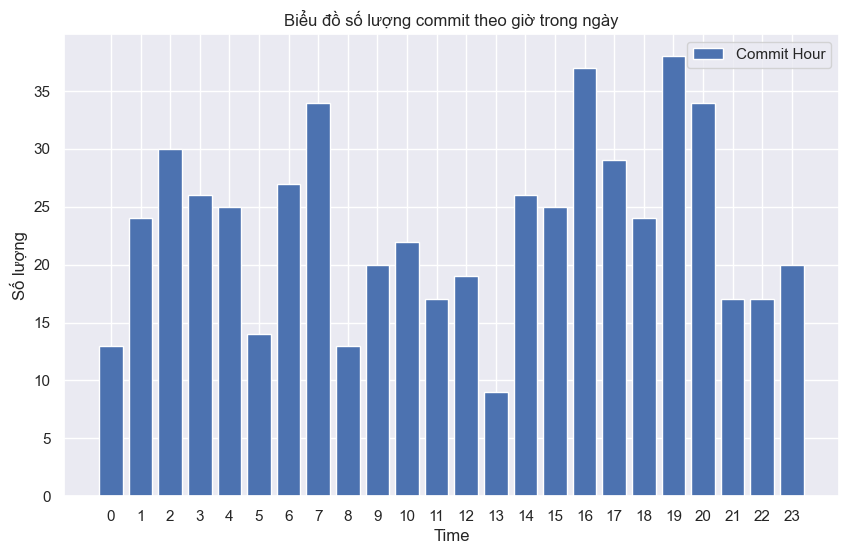

In [57]:
#Vẽ biểu đồ cột chồng
sns.set(style="darkgrid")
plt.figure(figsize=(10,6))

# Vẽ biểu đồ cột cho cột số lượng commit
plt.bar(table_df['Time'], table_df['Số lượng Commit'], alpha=1, label='Commit Hour')

plt.xlabel('Time')
plt.ylabel('Số lượng')
plt.title('Biểu đồ số lượng commit theo giờ trong ngày')
plt.xticks(table_df['Time'])
plt.legend()
plt.savefig('6.png')
plt.show()

<span style="color: blue;">NHẬN XÉT BIỂU ĐỒ</span>

In [58]:
#Biểu đồ này biểu thị số lượng commit theo giờ trong ngày

#1)Độ cao của các cột: Có một số giờ có số lượng commit cao như giờ 16, 20 và 19. Trong khi đó, có một số giờ có số lượng commit rất thấp hơn như giờ 13 và 5.
#2)Mô hình tăng giảm: Có một mô hình tăng giảm trong số lượng commit trong ngày. Ví dụ, từ 0h đến 2h có sự tăng trưởng trong số lượng commit, từ 3h đến 5h có sự giảm đi, từ 5h đến 13h số lượng commit có xu hướng xuống thấp(có tăng ở mức 6-7h). Tiếp tục từ 13h số lượng commit tiếp tục và đạt đỉnh ở 16h, 19h ,20h và từ 20 h trở đi số commit giảm về đêm.

#Từ biểu đồ ta nhận thấy người dùng có xu hướng làm việc về đêm muộn và khoảng thời gian chiều tối từ 16h đến 20h. Các khung giờ khác như 5h đến 13h có thể là khoảng thời gian làm việc chính của 1 ngày nên số lượng commit thể hiện là thấp nhất.


### 3.Xu hướng tạo commit của người dùng vào buổi nào trong ngày?(Buổi sáng: 6h -> 11h---Buổi trưa: 11h -> 13h---Buổi chiều: 13h -> 18h---Buổi tối: 18h trở đi)

<span style="color: blue;">LẬP DATAFRAME TÍNH SỐ LƯỢNG COMMIT TRONG CÁC BUỔI TRONG NGÀY<span>

In [59]:
# Hàm giờ vào buổi
def map_to_period(hour):
    if 6 <= hour < 11:
        return 'Buổi sáng'
    elif 11 <= hour < 13:
        return 'Buổi trưa'
    elif 13 <= hour < 18:
        return 'Buổi chiều'
    else:
        return 'Buổi tối'

# Thêm cột "Buổi" vào DataFrame
table_df['Buổi'] = table_df['Time'].apply(map_to_period)
# Tính tổng số lượng theo buổi
df_grouped = table_df.groupby('Buổi').sum()
# Xóa cột "Time" khỏi DataFrame
df_grouped = df_grouped.drop('Time', axis=1)
df_grouped.head()

,Số lượng Commit
Buổi,
Buổi chiều,126
Buổi sáng,116
Buổi trưa,36
Buổi tối,282


<span style="color: blue;">VẼ BIỂU ĐỒ CỘT CHO DATAFRAME TRÊN<span>

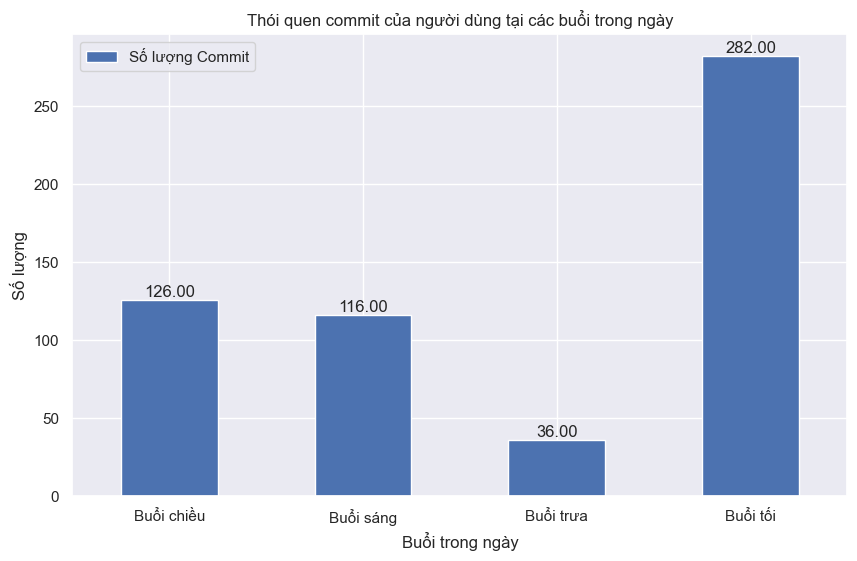

In [60]:
# Vẽ biểu đồ cột
ax = df_grouped.plot(kind='bar', rot=0,figsize=(10,6))

# Hiển thị số trên các cột
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()    
    ax.annotate(f'{height:.2f}', (x + width/2, y + height), ha='center', va='bottom')

# Thiết lập tiêu đề và nhãn trục
plt.title('Thói quen commit của người dùng tại các buổi trong ngày')
plt.xlabel('Buổi trong ngày')
plt.ylabel('Số lượng')
plt.savefig('7.png')
# Hiển thị biểu đồ
plt.show()

<span style="color: blue;">NHẬN XÉT BIỂU ĐỒ</span>

In [61]:
#Biểu đồ thể hiện số lượng commit theo buổi trong ngày (Buổi sáng: 6h -> 11h---Buổi trưa: 11h -> 13h---Buổi chiều: 13h -> 18h---Buổi tối: 18h trở đi)
#1)Độ cao của các cột: Độ cao cột tăng dần theo thứ tự: trưa, sáng, chiều, tối

#Từ biểu đồ ta nhận thấy người dùng có xu hướng làm việc vào buổi tối(18h- 5h sáng hôm sau), buổi sáng và buổi trưa có thể là thời gian học tập, làm việc và nghỉ ngơi của người dùng.

## Phân tích cột Additions, Deletions, Num Changed Files

### Câu hỏi phân tích

In [62]:
#1.Tổng số lượng dòng thêm và xóa, số tập tin thay đổi trên tất cả các commit là bao nhiêu?Bình quân số lượng dòng thêm,xóa và số lượng tập tin thay đổi trên mỗi commit là bao nhiêu?
#2.Có mối tương quan nào giữa số dòng thêm, số dòng xóa với số tập tin đã thay đổi không?

### 1.Tổng số lượng dòng thêm và xóa, số tập tin thay đổi trên tất cả các commit là bao nhiêu?Bình quân số lượng dòng thêm,xóa và số lượng tập tin thay đổi trên mỗi commit là bao nhiêu?

<span style="color: blue;">TỔNG SỐ LƯỢNG DÒNG THÊM, XÓA, SỐ LƯỢNG TẬP TIN THAY ĐỔI TRÊN TẤT CẢ CÁC COMMIT<span>

In [63]:
addition_count = (df['Additions']).sum()
print("Tổng số lượng dòng thêm được ghi lại trong dữ liệu:", addition_count)

Tổng số lượng dòng thêm được ghi lại trong dữ liệu: 11554


In [64]:
deletion_count = (df['Deletions']).sum()
print("Tổng số lượng dòng xóa được ghi lại trong dữ liệu:", deletion_count)

Tổng số lượng dòng xóa được ghi lại trong dữ liệu: 2617


In [65]:
changed_file_count = (df['Num Changed Files']).sum()
print("Tổng số lượng tập tin thay đổi được ghi lại trong dữ liệu:", changed_file_count)

Tổng số lượng tập tin thay đổi được ghi lại trong dữ liệu: 823


<span style="color: blue;">BÌNH QUÂN SỐ LƯỢNG DÒNG THÊM, XÓA VÀ SỐ LƯỢNG TẬP TIN THAY ĐỔI TRÊN MỖI COMMIT<span>

In [66]:
commit_count = len(df['Commit ID'])
print("Bình quân số lượng dòng thêm trên mỗi commit là:",addition_count/commit_count)

Bình quân số lượng dòng thêm trên mỗi commit là: 20.632142857142856


In [67]:
print("Bình quân số lượng dòng xóa trên mỗi commit là:",deletion_count/commit_count)

Bình quân số lượng dòng xóa trên mỗi commit là: 4.673214285714286


In [68]:
print("Bình quân số lượng tập tin thay đổi trên mỗi commit là:",changed_file_count/commit_count)

Bình quân số lượng tập tin thay đổi trên mỗi commit là: 1.4696428571428573


### 2.Có mối tương quan nào giữa số dòng thêm, số dòng xóa với số tập tin đã thay đổi không?

<span style="color: blue;">DATA FRAME THỂ HIỆN MỐI TƯƠNG QUAN GIỮA SỐ DÒNG THÊM, SỐ DÒNG XÓA VÀ SỐ TẬP TIN ĐÃ THAY ĐỔI<span>

In [69]:
# Tính tương quan
correlation = df[['Additions','Deletions','Num Changed Files']].corr()
correlation

,Additions,Deletions,Num Changed Files
Additions,1.000000,0.258153,0.409760
Deletions,0.258153,1.000000,0.361865
Num Changed Files,0.409760,0.361865,1.000000


<span style="color: blue;">NHẬN XÉT DATA FRAME<span>

## Phân tích cột Author Name

### Câu hỏi phân tích

In [70]:
#1.Có bao nhiêu tác giả khác nhau trong dữ liệu?Tác giả nào có số lượng commit nhiều nhất?Tác giả nào có số lượng commit ít nhất?
#2.Tác giả nào có số dòng thay đổi lớn nhất và ít nhất trong tất cả commit của tác giả đó(tổng additions và deletions)?Tác giả nào có số tệp tin thay đổi nhiều nhất và ít nhất trong tất cả commit  của tác giả đó (num changed files)?
#3.Các yêú tố Frequency(tần suất xuất hiện của 1 tác giả), Sum Deletions(tổng số dòng xóa trong tất cả các commit của 1 tác giả), Sum Changed Files(tổng số tập tin thay đổi trong tất cả các commit của 1 tác giả), Sum Additions + Deletions(tổng số dòng thay đổi trong tất cả các commit của 1 tác giả) có tương quan với nhau như thế nào ?
#4.Tác giả nào đóng góp lâu nhất?
#5.Có bao nhiêu tác giả đóng góp qua từng năm?

### 1.Có bao nhiêu tác giả khác nhau trong dữ liệu?Tác giả nào có số lượng commit nhiều nhất?Tác giả nào có số lượng commit ít nhất?

<span style="color: blue;">SỐ LƯỢNG TÁC GIẢ KHÁC NHAU TRONG DỮ LIỆU<span>

In [71]:
num_authors = df['Author Name'].nunique()
print("Số lượng tác giả khác nhau trong dữ liệu là:", num_authors)

Số lượng tác giả khác nhau trong dữ liệu là: 135


<span style="color: blue;">DANH SÁCH CÁC TÁC GIẢ<span>

In [72]:
authors = df['Author Name'].unique()
print("Danh sách tác giả:")
authors

Danh sách tác giả:


array(['aymericdamien', 'Hemant Rakesh', 'Karthikeyan Singaravelan',
       'Aymeric Damien', 'vishal sharma', 'cgohlke', 'Ilari Pihlajisto',
       'angrypark', 'Csaba Kertész', 'Gershom A', 'Aarni Koskela',
       'ChemicalXandco', 'fraxmans', 'Andy1621', 'Akshay.L.Aradhya',
       'Ahmet Hamza Emra', 'plooney', 'Kyle Kosic', 'John B Nelson',
       'Tianxiang Gao', 'Christopher Brust', 'Chris Oelmueller', 'Legor',
       'Amitayus', 'Torrencem', 'windog18', 'zhengyao jiang',
       'Shuolongbj', 'exelents', 'willduan', 'Colin Skow', 'ArtiPyHeart',
       'Ruslan Melnikov', 'Jesper Jaxing', 'Eduardo Pinho', 'WHAAAT',
       'caoyi', 'Ryohei Kuroki', 'octy40', 'Jimsparkle', 'Kiran Karkera',
       'psnegi', 'aos17-2016310607', 'Allen Guo', 'Ruslanmlnkv',
       'Hunchul Park', 'Andy Port', 'Eric Perbos-Brinck', 'lipixun',
       'Rokic', 'Ashley Williamson', 'Jiming Ye', 'Robin Kobus',
       'Ethan Bennett', 'Jacob Clark', 'happynoom', 'wyj2046', '田至伟',
       'Torben Peters', 'nogux

<span style="color: blue;">LẬP DATAFRAME THỂ HIỆN TẦN SUẤT XUẤT HIỆN CÁC TÁC GIẢ TRONG BẢNG DỮ LIỆU <span>

In [73]:
# Đếm số lần xuất hiện của mỗi tác giả và email
author_frequency = df.groupby(['Author Name', 'Author Email']).size().reset_index(name='Frequency')
author_frequency = author_frequency.sort_values(by='Frequency', ascending=False).reset_index(drop=True)
author_frequency

,Author Name,Author Email,Frequency
0,aymericdamien,aymeric.damien@gmail.com,191
1,Aymeric Damien,aymeric.damien@gmail.com,104
2,Will Ballard,wballard@mailframe.net,22
3,aymericdamien,damien@immomo.com,21
4,ichuang,ichuang@mit.edu,9
...,...,...,...
134,Jimsparkle,jimip6c12@gmail.com,1
135,Jiming Ye,415386365@qq.com,1
136,Jesper Jaxing,jesper.jaxing01@gmail.com,1
137,Jakub Simanek,simanek@spaceknow.com,1


<span style="color: blue;">LẬP DATA FRAME THỂ HIỆN TẦN XUẤT TÁC GIẢ CÓ CÙNG SỐ COMMIT<span>

In [74]:
# Đếm số tác giả có cùng Frequency
count_df = author_frequency.groupby('Frequency')['Author Name'].count().reset_index(name='Count')
count_df

,Frequency,Count
0,1,94
1,2,23
2,3,9
3,4,3
4,5,1
5,6,1
6,7,2
7,9,2
8,21,1
9,22,1


<span style="color: blue;">THÔNG TIN VỀ  CÁC TÁC GIẢ CÓ NHIỀU COMMIT NHẤT<span>

In [75]:
max_frequency_author=author_frequency['Frequency'].max()
max_frequency_author=author_frequency.loc[author_frequency['Frequency']==max_frequency_author]
max_frequency_author

,Author Name,Author Email,Frequency
0,aymericdamien,aymeric.damien@gmail.com,191


<span style="color: blue;">THÔNG TIN VỀ CÁC TÁC GIẢ CÓ ÍT COMMIT NHẤT<span>

In [76]:
min_frequency_author=author_frequency['Frequency'].min()
min_frequency_author=author_frequency.loc[author_frequency['Frequency']==min_frequency_author]
min_frequency_author

,Author Name,Author Email,Frequency
45,Wah Loon Keng,kengzwl@gmail.com,1
46,aos17-2016310607,ckf740925911@163.com,1
47,Илья Юрков,urkov@lightsoft.ru,1
48,angrypark,sungnam1108@naver.com,1
49,alex04309,alex04309@yopmail.com,1
...,...,...,...
134,Jimsparkle,jimip6c12@gmail.com,1
135,Jiming Ye,415386365@qq.com,1
136,Jesper Jaxing,jesper.jaxing01@gmail.com,1
137,Jakub Simanek,simanek@spaceknow.com,1


### 2.Tác giả nào có số dòng thay đổi lớn nhất và ít nhất trong tất cả commit của tác giả đó(tổng additions và deletions)?Tác giả nào có số tệp tin thay đổi nhiều nhất và ít nhất trong tất cả commit  của tác giả đó (num changed files)?

<span style="color: blue;">LẬP DATA FRAME GỒM 5 CỘT AUTHOR NAME, AUTHOR EMAIL, SUM ADDITIONS, SUM DELETIONS, SUM CHANGED FILES, SUM ADDITIONS + DELETIONS<span>

In [77]:
# Đếm số lần Author xuất hiện trong bảng dữ liệu
frequency_df = df.groupby('Author Name')['Author Name'].count().reset_index(name='Frequency')

# Tính tổng Additions, Deletions, Changed Files của mỗi tác giả
sum_additions_df = df.groupby('Author Name')['Additions'].sum().reset_index(name='Sum Additions')
sum_deletions_df = df.groupby('Author Name')['Deletions'].sum().reset_index(name='Sum Deletions')
sum_changed_files_df = df.groupby('Author Name')['Num Changed Files'].sum().reset_index(name='Sum Changed Files')

# Kết hợp các DataFrame lại với nhau
data = pd.merge(frequency_df, sum_additions_df, on='Author Name')
data = pd.merge(data, sum_deletions_df, on='Author Name')
data = pd.merge(data, sum_changed_files_df, on='Author Name')
data['Sum Additions + Deletions']=data['Sum Additions']+data['Sum Deletions']
data = pd.merge(data, df[['Author Name', 'Author Email']], on='Author Name').drop_duplicates()
data = data.sort_values(by='Sum Additions + Deletions', ascending=False).reset_index(drop=True)
data

,Author Name,Frequency,Sum Additions,Sum Deletions,Sum Changed Files,Sum Additions + Deletions,Author Email
0,aymericdamien,212,4896,1339,369,6235,damien@immomo.com
1,aymericdamien,212,4896,1339,369,6235,aymeric.damien@gmail.com
2,Aymeric Damien,105,1725,337,138,2062,aymeric.damien@gmail.com
3,Aymeric Damien,105,1725,337,138,2062,damien@immomo.com
4,Will Ballard,22,656,107,37,763,wballard@mailframe.net
...,...,...,...,...,...,...,...
134,Wieland Brendel,1,1,1,1,2,wielandbrendel@users.noreply.github.com
135,Zachary A Estela,1,1,1,1,2,zestela@gmail.com
136,alex04309,1,1,1,1,2,alex04309@yopmail.com
137,angrypark,1,1,1,1,2,sungnam1108@naver.com


<span style="color: blue;">THÔNG TIN VỀ CÁC TÁC GIẢ CÓ SỐ LƯỢNG DÒNG THAY ĐỔI NHIỀU NHẤT TRONG TẤT CẢ CÁC COMMIT CỦA TÁC GIẢ ĐÓ<span>

In [78]:
max_changed_author=data['Sum Additions + Deletions'].max()
max_changed_author=data.loc[data['Sum Additions + Deletions']==max_changed_author]
max_changed_author

,Author Name,Frequency,Sum Additions,Sum Deletions,Sum Changed Files,Sum Additions + Deletions,Author Email
0,aymericdamien,212,4896,1339,369,6235,damien@immomo.com
1,aymericdamien,212,4896,1339,369,6235,aymeric.damien@gmail.com


<span style="color: blue;">THÔNG TIN VỀ CÁC TÁC GIẢ CÓ SỐ LƯỢNG DÒNG THAY ĐỔI ÍT NHẤT TRONG TẤT CẢ CÁC COMMIT CỦA TÁC GIẢ ĐÓ<span>

In [79]:
min_changed_author=data['Sum Additions + Deletions'].min()
min_changed_author=data.loc[data['Sum Additions + Deletions']==min_changed_author]
min_changed_author.head()

,Author Name,Frequency,Sum Additions,Sum Deletions,Sum Changed Files,Sum Additions + Deletions,Author Email
108,octy40,1,1,1,1,2,octy40@users.noreply.github.com
109,rmno,1,1,1,1,2,r.bodha@gmail.com
110,zhengyao jiang,1,1,1,1,2,jzyjiangzhengyao@gmail.com
111,noguxun,1,1,1,1,2,noguxun@gmail.com
112,tyfkda,1,1,1,1,2,tyfkda@gmail.com


<span style="color: blue;">THÔNG TIN VỀ CÁC TÁC GIẢ CÓ SỐ LƯỢNG TỆP TIN THAY ĐỔI NHIỀU NHẤT TRONG TẤT CẢ CÁC COMMIT CỦA TÁC GIẢ ĐÓ<span>

In [80]:
max_changed_author=data['Sum Changed Files'].max()
max_changed_author=data.loc[data['Sum Changed Files']==max_changed_author]
max_changed_author

,Author Name,Frequency,Sum Additions,Sum Deletions,Sum Changed Files,Sum Additions + Deletions,Author Email
0,aymericdamien,212,4896,1339,369,6235,damien@immomo.com
1,aymericdamien,212,4896,1339,369,6235,aymeric.damien@gmail.com


<span style="color: blue;">THÔNG TIN VỀ CÁC TÁC GIẢ CÓ SỐ LƯỢNG TỆP TIN THAY ĐỔI ÍT NHẤT TRONG TẤT CẢ CÁC COMMIT CỦA TÁC GIẢ ĐÓ<span>

In [81]:
min_changed_author=data['Sum Changed Files'].min()
min_changed_author=data.loc[data['Sum Changed Files']==min_changed_author]
min_changed_author.head()

,Author Name,Frequency,Sum Additions,Sum Deletions,Sum Changed Files,Sum Additions + Deletions,Author Email
20,Amitayus,1,41,45,1,86,Amitayus@users.noreply.github.com
22,JohnAllen,1,77,0,1,77,johnjalleniii@gmail.com
26,aos17-2016310607,1,65,0,1,65,ckf740925911@163.com
29,Hvass-Labs,1,34,20,1,54,Hvass-Labs@users.noreply.github.com
37,Jiming Ye,1,17,23,1,40,415386365@qq.com


### 3.Các yêú tố Frequency(tần suất xuất hiện của 1 tác giả), Sum Deletions(tổng số dòng xóa trong tất cả các commit của 1 tác giả), Sum Changed Files(tổng số tập tin thay đổi trong tất cả các commit của 1 tác giả), Sum Additions + Deletions(tổng số dòng thay đổi trong tất cả các commit của 1 tác giả) có tương quan với nhau như thế nào ?

<span style="color: blue;">LẬP MA TRẬN TƯƠNG QUAN GIỮA CÁC YẾU TỐ FREQUENCY, SUM DELETIONS, SUM ADDITIONS, SUM CHANGED FILES, SUM ADDITIONS + DELETIONS<span>

In [82]:
# Tính tương quan
correlation = data[['Frequency', 'Sum Deletions','Sum Additions', 'Sum Changed Files', 'Sum Additions + Deletions']].corr()
correlation

,Frequency,Sum Deletions,Sum Additions,Sum Changed Files,Sum Additions + Deletions
Frequency,1.000000,0.975115,0.987827,0.994504,0.986746
Sum Deletions,0.975115,1.000000,0.990305,0.992238,0.993940
Sum Additions,0.987827,0.990305,1.000000,0.995605,0.999573
Sum Changed Files,0.994504,0.992238,0.995605,1.000000,0.996502
Sum Additions + Deletions,0.986746,0.993940,0.999573,0.996502,1.000000


<span style="color: blue;">NHẬN XÉT DATA FRAME<span>

In [83]:
#Có mối tương quan rất rõ giữa các yếu tố Frequency, Sum Deletions, Sum Additions, Sum Changed Files, Sum Additions + Deletions.

#Từ đó ta thấy được các tác giả đóng góp nhiều commit thường có thì cũng có xu hướng đóng góp nhiều trong việc chỉnh xửa, fix lỗi cho các file, các tập tin một cách rất cẩn thận

### 4.Tác giả nào đóng góp lâu nhất?

<span style="color: blue;">LẬP DATA FRAME TÌM CÁC TÁC GIẢ CÓ ĐÓNG GÓP 4 NĂM(VÌ KHÔNG CÓ AI ĐÓNG GÓP 5 NĂM)

In [84]:
# Chuyển đổi cột 'Commit Date' sang định dạng datetime
df['Commit Date'] = pd.to_datetime(df['Commit Date'])

# Lấy danh sách các tác giả
authors = df['Author Name'].unique()

filtered_authors = []
for author in authors:
    author_df = df[df['Author Name'] == author]
    years_with_commit = author_df['Commit Date'].dt.year.unique()
    if len(years_with_commit) == 4 and len(df['Commit Date'].dt.year.unique()) == 5:
        filtered_authors.append(author)

# Lọc ra dataframe mới với các tác giả thỏa mãn điều kiện
filtered_df = df[df['Author Name'].isin(filtered_authors)][['Author Name', 'Author Email']].drop_duplicates()

filtered_df


,Author Name,Author Email
0,aymericdamien,aymeric.damien@gmail.com
4,Aymeric Damien,aymeric.damien@gmail.com
495,aymericdamien,damien@immomo.com
590,Aymeric Damien,damien@immomo.com


In [85]:
#Tác giả có đóng góp lâu nhất là tác giả aymericdamien

<span style="color: blue;">LẬP DATA FRAME TÌM CÁC TÁC GIẢ CÓ ĐÓNG GÓP 2 NĂM(VÌ KHÔNG CÓ AI ĐÓNG GÓP 3 NĂM)

In [86]:
# Chuyển đổi cột 'Commit Date' sang định dạng datetime
df['Commit Date'] = pd.to_datetime(df['Commit Date'])

# Lấy danh sách các tác giả
authors = df['Author Name'].unique()

filtered_authors = []
for author in authors:
    author_df = df[df['Author Name'] == author]
    years_with_commit = author_df['Commit Date'].dt.year.unique()
    if len(years_with_commit) == 2 and len(df['Commit Date'].dt.year.unique()) == 5:
        filtered_authors.append(author)

# Lọc ra dataframe mới với các tác giả thỏa mãn điều kiện
filtered_df = df[df['Author Name'].isin(filtered_authors)][['Author Name', 'Author Email']].drop_duplicates()

filtered_df


,Author Name,Author Email
8,vishal sharma,vishal.sharma@usu.edu
10,Ilari Pihlajisto,ilaripih@gmail.com
40,Ilari Pihlajisto,ilari.pihlajisto@mbnet.fi
85,psnegi,psnegi@users.noreply.github.com
185,ziky90,zikes@spaceknow.com


### 5.Có bao nhiêu tác giả đóng góp qua từng năm?

<span style="color: blue;">LẬP DATA FRAME THẾ HIỆN SỐ LƯỢNG TÁC GIẢ ĐÓNG GÓP QUA TỪNG NĂM<span>

In [87]:
df_copy=df.copy()
# Tạo cột 'year' và 'month' từ cột 'Created At'
df_copy['year'] = pd.to_datetime(df_copy['Commit Date']).dt.year
df_copy['month'] = pd.to_datetime(df_copy['Commit Date']).dt.month

# Nhóm các submission theo 'year' và 'month', và đếm số lượng tác giả khác nhau
grouped = df_copy.groupby(['year'])
num_author = grouped['Author Name'].nunique().reset_index()

# Đổi tên cột 'Author' thành 'num_author'
num_author.columns = ['year', 'num_author']
num_author

,year,num_author
0,2016,76
1,2017,50
2,2018,14
3,2019,1
4,2020,4


In [88]:
del df_copy

<span style="color: blue;">VẼ BIỂU ĐỒ CỘT CHO DATA FRAME TRÊN<span>

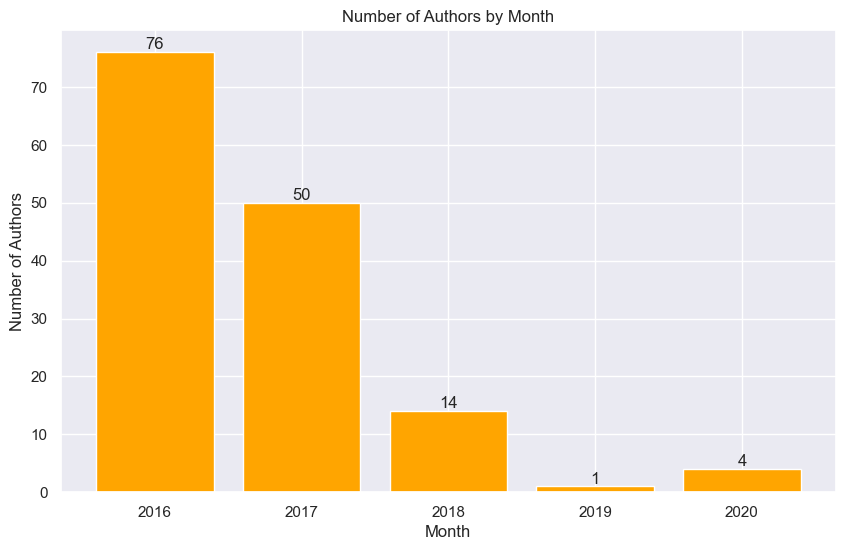

In [89]:
# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
bars = plt.bar(num_author['year'], num_author['num_author'], color='orange', alpha=1)

# Đặt số lượng lên mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, height,
             ha='center', va='bottom')

# Đặt tên cho trục x và trục y
plt.xlabel('Month')
plt.ylabel('Number of Authors')

# Đặt tên cho đồ thị
plt.title('Number of Authors by Month')
plt.savefig('8.png')
# Hiển thị biểu đồ
plt.show()

<span style="color: blue;">NHẬN XÉT BIỂU ĐỒ</span>

In [90]:
#Biểu đồ thể hiện số tác giả đóng góp qua từng năm từ năm 2016 đến năm 2020

#Ta nhận xét: Số tác giả đóng góp giảm mạnh theo thứ tự qua các năm 2016, 2017, 2018, 2019, 2020. Nguyên nhân có thể là do chủ đề repository có độ hot giảm dần qua các năm

## Phân tích cột Author Email

### Câu hỏi phân tích

In [91]:
#1.Có bao nhiêu địa chỉ email khác nhau trong cột "Author Email"?Liệt kê các địa chỉ email duy nhất trong cột "Author Email"?
#2.Tần suất xuất hiện các loại đuôi của email (vd: gmail.com, huntr.dev, usu.edu,...) là bao nhiêu?
#3.Các đuôi email được đề cập trong bảng dữ liệu đến từ các quốc gia nào? Quốc gia nào chiếm phần lớn?

### 1.Có bao nhiêu địa chỉ email khác nhau trong cột "Author Email"?Liệt kê các địa chỉ email duy nhất trong cột "Author Email"?

<span style="color: blue;">TÌM SỐ LƯỢNG ĐỊA CHỈ EMAIL KHÁC NHAU VÀ LẬP DATA FRAME LIỆT KÊ DANH SÁCH EMAIL KHÁC NHAU<span>

In [92]:
author_email=df['Author Email'].unique()
print("Số địa chỉ email khác nhau trong cột:",len(author_email))

Số địa chỉ email khác nhau trong cột: 130


In [93]:
author_email=df['Author Email'].unique()
df_email = pd.DataFrame(author_email, columns=['Author Email'])
df_email

,Author Email
0,aymeric.damien@gmail.com
1,basketballlife600@gmail.com
2,tir.karthi@gmail.com
3,vishal.sharma@usu.edu
4,cjgohlke@gmail.com
...,...
125,johnjalleniii@gmail.com
126,jdsutton@calpoly.edu
127,brettnaul@gmail.com
128,adrianlyjak@gmail.com


### 2.Tần suất xuất hiện các loại đuôi của email (vd: gmail.com, huntr.dev, usu.edu,...) là bao nhiêu?

<span style="color: blue;">LẬP DATA FRAME TÌM DANH SÁCH ĐUÔI KHÁC NHAU CỦA EMAIL<span>

In [94]:
# Lập data frame
df_email= pd.DataFrame({'Author Email': author_email})

# Lấy các loại tài khoản
account_types = df['Author Email'].apply(lambda email: email.split('@')[-1]).unique()
df_email_đuôi = pd.DataFrame(account_types, columns=['Type Author Email'])
df_email_đuôi.head()

,Type Author Email
0,gmail.com
1,usu.edu
2,naver.com
3,outlook.com
4,iki.fi


<span style="color: blue;">LẬP DATA FRAME THỂ HIỆN TẦN SUẤT CHO DANH SÁCH TRÊN<span>

In [95]:
# Danh sách các đuôi email cần lấy
email_suffixes = df_email_đuôi['Type Author Email'].tolist()

# Tạo danh sách trống
frequency_list = []

# Lặp qua từng hàng trong data frame
for index, row in df_email.iterrows():
    author_email = row["Author Email"]
    for suffix in email_suffixes:
        if suffix in author_email:
            # Tăng số lần xuất hiện của đuôi trong danh sách
            frequency_list.append(suffix)

# Tạo data frame từ danh sách đuôi và số lần xuất hiện
frequency_df = pd.DataFrame({"Type": frequency_list})
frequency_counts = frequency_df["Type"].value_counts().reset_index()
frequency_counts.columns = ["Type", "Frequency"]

frequency_counts.head()

,Type,Frequency
0,gmail.com,62
1,users.noreply.github.com,19
2,qq.com,5
3,163.com,4
4,hotmail.com,2


<span style="color: blue;">NHẬN XÉT DATA FRAME TRÊN<span>

In [96]:
#Các tác giả đóng góp hầu như đều sử dụng tài khoản gmail hoặc tài khoản github

### 3.Các đuôi email được đề cập trong bảng dữ liệu đến từ các quốc gia nào? Quốc gia nào chiếm phần lớn?

<span style="color: blue;">LẬP DATA FRAME THỀ HIỆN CÁC QUỐC GIA TƯƠNG ỨNG VỚI ĐUÔI EMAIL<span>

In [97]:
# Tạo từ điển ánh xạ giữa đuôi email và quốc gia
mapping = {
    "gmail.com": "Global",
    "users.noreply.github.com": "Global",
    "mailframe.net": "Global",
    "immomo.com": "China",
    "spaceknow.com": "Czech Republic",
    "mit.edu": "United States",
    "sina.com": "China",
    "calpoly.edu": "United States",
    "qq.com": "China",
    "163.com": "China",
    "googlemail.com": "Global",
    "melekhin.me": "Montenegro",
    "fyson.net": "Global",
    "vt.edu": "United States",
    "hotmail.com": "Global",
    "usu.edu": "United States",
    "yopmail.com": "Global",
    "126.com": "China",
    "web.de": "Germany",
    "perscitia.local": "Global",
    "holzfuss.name": "Global",
    "chas.io": "Global",
    "outlook.com": "Global",
    "mikesz.com": "Global",
    "naver.com": "South Korea",
    "sjtu.edu.cn": "China",
    "iki.fi": "Finland",
    "up.edu.ph": "Philippines",
    "gmai.com": "Unknown",
    "=": "Unknown",
    "lightsoft.ru": "Russia",
    "gmu.edu": "United States",
    "vincit.fi": "Finland",
    "waqu.com": "Unknown",
    "mail.hfut.edu.cn": "China",
    "aijia.io": "Global",
    "torrencefamily.net": "Global",
    "mbnet.fi": "Finland",
    "duolingo.com": "Global",
    "righto.com": "Global"
}

# Tạo DataFrame từ từ điển ánh xạ
df_nation = pd.DataFrame.from_dict(mapping, orient="index", columns=["Nation"])
df_nation.reset_index(inplace=True)
df_nation.columns = ["Type", "Nation"]
df_nation.head()

,Type,Nation
0,gmail.com,Global
1,users.noreply.github.com,Global
2,mailframe.net,Global
3,immomo.com,China
4,spaceknow.com,Czech Republic


<span style="color: blue;">THÊM CỘT TẦN XUẤT XUẤT HIỆN CỦA CÁC ĐUÔI EMAIL TRONG BẢNG DỮ LIỆU VÀO DATA FRAME TRÊN<span>

In [98]:
df_merged = pd.merge(frequency_counts, df_nation, on="Type")
df_merged.head()

,Type,Frequency,Nation
0,gmail.com,62,Global
1,users.noreply.github.com,19,Global
2,qq.com,5,China
3,163.com,4,China
4,hotmail.com,2,Global


<span style="color: blue;">VẼ BIỂU ĐỒ VIỀN TRÒN TỪ DATA FRAME TRÊN<span>

In [99]:
# Tạo DataFrame mới từ dữ liệu gốc
df_commit = df_merged.groupby("Nation")["Frequency"].sum().reset_index()
df_commit.columns = ["Nation", "Commit"]
df_commit

,Nation,Commit
0,China,14
1,Czech Republic,2
2,Finland,3
3,Germany,1
4,Global,98
5,Montenegro,1
6,Russia,1
7,South Korea,1
8,United States,6
9,Unknown,3


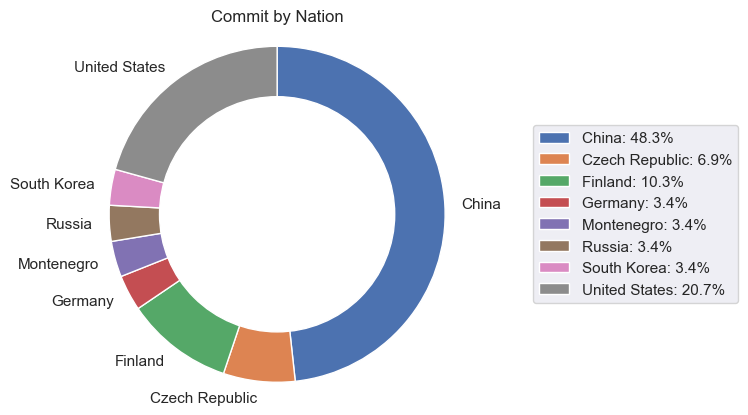

In [100]:
# Lọc dữ liệu, loại bỏ "Global"
df_filtered = df_commit[(df_commit["Nation"] != "Global")&(df_commit["Nation"] != "Unknown")]

# Dữ liệu
nation = df_filtered["Nation"]
commit = df_filtered["Commit"]

# Vẽ biểu đồ tròn
plt.pie(commit, labels=nation, startangle=90, counterclock=False, autopct='')

# Tạo chuỗi chứa nhãn và phần trăm
labels = [f'{n}: {p:.1f}%' for n, p in zip(nation, commit/sum(commit)*100)]

# Hiển thị chú thích với phần trăm
plt.legend(labels, bbox_to_anchor=(1, 0.5), loc='center left')

# Tạo đường viền tròn
circle = plt.Circle((0, 0), 0.7, color='white')
fig = plt.gcf()
fig.gca().add_artist(circle)



# Thêm tiêu đề
plt.title("Commit by Nation")

# Hiển thị biểu đồ tròn
plt.axis('equal')
plt.savefig('9.png')
plt.show()

<span style="color: blue;">NHẬN XÉT BIỂU ĐỒ</span>

In [101]:
#Biểu đồ thể hiện quốc gia của các tác giả (không kể các email là global)

#Dựa vào biểu đồ ta thấy các bài commit thường đến từ các quốc gia ở Châu Á(Trung Quốc, Hàn, Nga,..) và các quốc gia đến từ Châu Âu(Đức, Phần Lan, Czech,..) và Châu Mĩ có 1 đại diện là Mĩ. Trong đó Trung Quốc đóng góp lớn nhất, tiếp theo sau là Mĩ. Các bài commit thường đến từ các trường đại học, tổ chức nghiên cứu, các công ti(dựa vào đuôic email)

## Phân tích cột Changed Files

### Câu hỏi phân tích

In [102]:
#1.Tệp tin nào đã được thay đổi nhiều nhất trong mỗi commit?
#2.Tệp tin thay đổi thường là loại tệp tin gì?

### 1.Tệp tin nào đã được thay đổi nhiều nhất trong mỗi commit?

<span style="color: blue;">LẬP DATA FRAME TÌM TẬP TIN THAY ĐỔI NHIỀU NHẤT TRONG MỖI COMMIT<span>

In [103]:
df_copy = df.copy()
df_copy["Changed Files"] = df_copy["Changed Files"].apply(eval)  # Chuyển chuỗi thành danh sách
df_copy["File thay đổi nhiều nhất trong commit"] = df_copy["Changed Files"].apply(lambda files: max(files, key=files.count))
result_df = df_copy[["Commit Message", "File thay đổi nhiều nhất trong commit"]]
result_df.head()

,Commit Message,File thay đổi nhiều nhất trong commit
0,fix indent,tflearn/activations.py
1,Adding triplet loss (#1161)\n\n* Added fashion...,tflearn/objectives.py
2,Added fashion_mnist dataset (#1160),tflearn/datasets/fashion_mnist.py
3,Fix syntax warning over comparison of literals...,examples/nlp/lstm_generator_textfile.py
4,merge (#1159),tflearn/activations.py


<span style="color: blue;">NHẬN XÉT DATA FRAME<span>

In [104]:
#Các file thay đổi thường là README.md và các file python trong tflearn

In [105]:
del df_copy

### 2.Tệp tin thay đổi thường là loại tệp tin gì?

<span style="color: blue;">LẬP DATA FRAME TÌM CÁC LOẠI TẬP TIN<span>

In [106]:
df_copy = df.copy()
df_copy["Changed Files"] = df_copy["Changed Files"].str.split(",")
account_types = df_copy['Changed Files'].explode().dropna().apply(lambda file: file.split('.')[-1]).unique()
df_file_đuôi = pd.DataFrame(account_types, columns=['Type File'])
df_file_đuôi['Type File'] = df_file_đuôi['Type File'].str.extract(r'([a-zA-Z]+)')
df_file_đuôi = df_file_đuôi.drop_duplicates(subset=['Type File'])
df_file_đuôi['Type File'] = df_file_đuôi['Type File'].apply(lambda x: '.' + x)
df_file_đuôi

,Type File
0,.py
2,.md
4,.yml
6,.xml
7,.gitignore
8,.ACKNOWLEDGMENTS
9,.ipynb


In [107]:
# Danh sách các đuôi file cần lấy
file_suffixes = df_file_đuôi['Type File'].tolist()

# Tạo danh sách trống
frequency_list = []

# Lặp qua từng hàng trong data frame
for index, row in df.iterrows():
    file = row["Changed Files"]
    for suffix in file_suffixes:
        if suffix in file:
            # Tăng số lần xuất hiện của đuôi trong danh sách
            frequency_list.append(suffix)

# Tạo data frame từ danh sách đuôi và số lần xuất hiện
frequency_df = pd.DataFrame({"Type": frequency_list})
frequency_counts = frequency_df["Type"].value_counts().reset_index()
frequency_counts.columns = ["Type", "Frequency"]

frequency_counts.head()

,Type,Frequency
0,.py,493
1,.md,79
2,.yml,18
3,.gitignore,6
4,.xml,1


<span style="color: blue;">NHẬN XÉT DATA FRAME<span>

In [108]:
#Các loại file thường thay đổi là .py(tệp Python), .md(tệp Markdown),.yml(tệp YAML), .xml(tệp XML), .gitignore(tệp tin Git Ignore)
#Từ đó ta thấy các tệp tin thay đổi thường liên quan mã nguồn python, ghi chú, phân tích dữ liệu, chứa các thông tin lưu trữ,...

# Interpretation & Conclusion

In [109]:
#Dưới đây là các kết luận sau khi chúng ta xử lí dữ liệu và phân tích:

#- Thứ nhất là yếu tố tháng, số lượng commit từ tháng 4 đến tháng 8 đạt mức cao có thể là do từ tháng 4 đến tháng 8 rơi vào mùa hè, mùa du lịch, sinh viên và nhiều người có thể có thời gian để trau dồi kiến thức và tìm hiểu thêm nhiều khóa học, vấn đề.
#- Thứ hai là yếu tố năm, số lượng commit giảm dần từ năm 2016 năm có thể là do năm 2016, 2017, vấn đề mới được đưa ra và rất nhiều người tò mò, đóng góp các commit, vấn đề giảm dần độ hot từ năm 2018 trở đi nên số lượng commit dần ít đi.
#- Thứ ba , ta dự đoán số lượng commit đạt được trong năm 2021 từ dữ liệu sự tăng trưởng từ năm 2019 đến năm 2020 bằng mô hình Linear Regression vànhận thấy số lượng commit dự đoán năm 2021 tăng nhẹ so với năm 2020.
#- Thứ tư, chủ đề của commit thường liên quan đến  vào việc sửa lỗi và cải thiện trong tài liệu và mã nguồn ; hỗ trợ, xử lý vấn đề, và xử lý dữ liệu ; các file thường là các hàm, lớp, Python và TensorFlow.
#- Thứ năm, người dùng có xu hướng làm việc vào buổi tối( 18h- 5h sáng hôm sau), buổi sáng và buổi trưa có thể là thời gian học tập, làm việc và nghỉ ngơi của người dùng nên số lượng commit thường ít vào thời điểm này.
#- Thứ sáu, tác giả đóng góp lâu nhất và nhiều nhất là Aymeric Damien.
#- Thứ bảy, ta thấy các bài commit thường đến từ các quốc gia ở Châu Á(Trung Quốc, Hàn, Nga,..) và các quốc gia đến từ Châu Âu(Đức, Phần Lan, Czech,..) và Châu Mĩ có 1 đại diện là Mĩ. Trong đó Trung Quốc đóng góp lớn nhất, tiếp theo sau là Mĩ. Các bài commit thường đến từ các trường đại học, tổ chức nghiên cứu, các công ti(dựa vào đuôi email).
#- Ta thấy các tệp tin thay đổi thường liên quan mã nguồn python, ghi chú, phân tích dữ liệu, chứa các thông tin lưu trữ,…( các file có dạng .py, .md, .yml, .xml, .gitignore, .ipynb, ….).